In [ ]:
!killall5

In [118]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 2.2 MB/s eta 0:00:00a 0:00:01


In [53]:
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader 
import matplotlib.pyplot as plt
import re
import seaborn as sns
import os
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import torch
from tqdm.notebook import tqdm
import json
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader 
from torch import cuda
import random

In [190]:
class EncoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(EncoderBlock, self).__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size=3)
        self.bn = nn.BatchNorm1d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
    
    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        #x = self.maxpool(x)
        return x

class DecoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DecoderBlock, self).__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size=3)
        self.bn = nn.BatchNorm1d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.upsample = nn.Upsample(scale_factor=2, mode='nearest')
    
    def forward(self, x):
        x = self.upsample(x)
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        return x

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            EncoderBlock(1, 8),
            EncoderBlock(8, 16),
            EncoderBlock(16, 1)
        )
        self.decoder = nn.Sequential(
            DecoderBlock(1, 12),
            DecoderBlock(12, 1)
            #nn.Conv2d(16, 1, kernel_size=3, stride=1, padding=1),
            #nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Usage example
# Create an instance of the autoencoder
#autoencoder = Autoencoder()

# Create a random input tensor
#input_tensor = torch.randn(1, 1, 28, 28)  # Assuming input size of 28x28

# Pass the input tensor through the autoencoder
#output_tensor = autoencoder(input_tensor)

#print(output_tensor.shape)  # Output shape: (1, 1, 28, 28)

17

In [2]:
class CustomDataset(Dataset):
    def __init__(self, data):
        self.data = data
       
    def __getitem__(self, index):
        
        x = self.data.iloc[index].to_numpy()
        tensor =  torch.Tensor(x).view(1,17)
        return tensor
    
    def __len__(self):
        return len(self.data)

In [3]:
stanki = pd.read_csv('Stanki.csv', sep=';')
cadastr = pd.read_csv('Cadastr.csv', sep=';')

In [129]:
patent = pd.read_csv('patent.csv', sep=';')

In [131]:
patent[100:200]

,N п/п,"Виды предпринимательской деятельности\n(выпадающий список при условии ""Организационно-правовая форма - ИП, \nпатент - нет"")","Потенциально возможный к получению годовой\nдоход (тыс. рублей)\n(значения, указанные ниже, зашиваются в формулу расчета при выборе соответствующего вида предпринимательской деятельности)",Ставка\n(значения столбца №3 умножаются автоматически на ставку 6%),Итого стоимость патента\n(тыс.рублей)\n(пользователю демонстрируются ниже указанные значения при выборе соответствующего вида предпринимательской деятельности),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
100,37.0,"Услуги, связанные с обслуживанием сельскохозяй...",1320.0,6%,"79,2",NaN,NaN,NaN,NaN
101,38.0,Деятельность по благоустройству ландшафта,660.0,6%,"39,6",NaN,NaN,NaN,NaN
102,39.0,"Охота, отлов и отстрел диких животных, в том ч...",660.0,6%,"39,6",NaN,NaN,NaN,NaN
103,40.0,Занятие медицинской деятельностью или фармацев...,6000.0,6%,360,NaN,NaN,NaN,NaN
104,41.0,Осуществление частной детективной деятельности...,6000.0,6%,360,NaN,NaN,NaN,NaN
105,42.0,Услуги по прокату,1980.0,6%,"118,8",NaN,NaN,NaN,NaN
106,43.0,Услуги экскурсионные туристические,660.0,6%,"39,6",NaN,NaN,NaN,NaN
107,44.0,"Организация обрядов (свадеб, юбилеев), в том ч...",1320.0,6%,"79,2",NaN,NaN,NaN,NaN
108,45.0,Организация похорон и предоставление связанных...,1320.0,6%,"79,2",NaN,NaN,NaN,NaN
109,46.0,"Услуги уличных патрулей, охранников, сторожей ...",660.0,6%,"39,6",NaN,NaN,NaN,NaN


In [ ]:
stanki

In [4]:
dataframe_main = pd.read_csv('data_main_noauth.csv', sep=';')

In [5]:
dataframe_main.head()

,Основная отрасль,Подотрасль промышленности,"Среднесписочная численность персонала, работающего в Москве, чел 2020","Среднесписочная численность персонала, работающего в Москве, чел. 2021","Средняя з.п. сотрудников, работающих в Москве, тыс.руб. 2020","Средняя з.п. сотрудников, работающих в Москве, тыс.руб. 2021","Налоги, уплаченные в бюджет Москвы, тыс.руб. 2021","Налоги, уплаченные в бюджет Москвы, тыс.руб. 2022","Налог на прибыль, тыс.руб. 2021","Налог на прибыль, тыс.руб. 2022","Налог на имущество, тыс.руб. 2021","Налог на имущество, тыс.руб. 2022","Налог на землю, тыс.руб. 2021","Налог на землю, тыс.руб. 2022","НДФЛ, тыс.руб. 2021","НДФЛ, тыс.руб. 2022","Транспортный налог, тыс.руб. 2021","Транспортный налог, тыс.руб. 2022",Прочие налоги 2021,Прочие налоги 2022
0,Пищевая промышленность,Молочная отрасль,"3341,306475","3281,812175","81,94022683","85,59601036","794681,8801","919608,1706","105864,199","270214,857","34989,812","41792,75174","3093,135","3094,458","634168,0545","576017,4715","1365,86731","119,18775","15200,81226","28369,44464"
1,Радиоэлектроника и приборостроение,Приборостроение,10286,10142,"81,4","96,4",1713044,"137776,9233",0,"-1393920,244",78306,"104577,1442",52676,"40470,708",1580410,"1364131,861",1652,"1836,373",0,"20681,08086"
2,Пищевая промышленность,Мясная отрасль,4112,3773,"66,20026281","67,66202722","506112,4034","837049,2302","69642,30371","460795,1905","4448,621","6950,94897",0,0,"414621,008","358110,0736","474,791","479,28039","16925,67975","10713,73676"
3,Пищевая промышленность,Мясная отрасль,2424,2452,"76,513","82,151","373946,5288","399359,0483","16308,897","116198,753","11393,425","24043,454",0,0,"305285,8274","238028,235",2680,"1226,988","38278,37944","19861,61833"
4,Авиационная промышленность,Сведения отсутствуют,"9204,25",7439,"90,72549183","97,54468497","1295545,487","955669,2663","15,56733361","-35551,685","123054,694","108917,7912","135848,7699","12721,92924","1014971,789","817572,1879","20434,118","17406,83467","1220,54871","34602,20825"


In [29]:
re.findall(r'-\d+', '45')

[]

In [6]:
dataframe_main.iloc[:, 2:].replace({',': '.'}, regex=True, inplace=True)
dataframe_main.iloc[:, 2:].replace({'-(.*)': '0'}, regex=True, inplace=True)

dataframe_main.iloc[:, 2:] = dataframe_main.iloc[:, 2:].astype(float)

/home/user/conda/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [8]:
test = dataframe_main.iloc[:, 2:]
final = test.loc[~(test==0).all(axis=1)]
#plt.matshow(final.iloc[:10,0:2].corr())
#plt.show()

In [9]:
final = final.apply(pd.to_numeric)

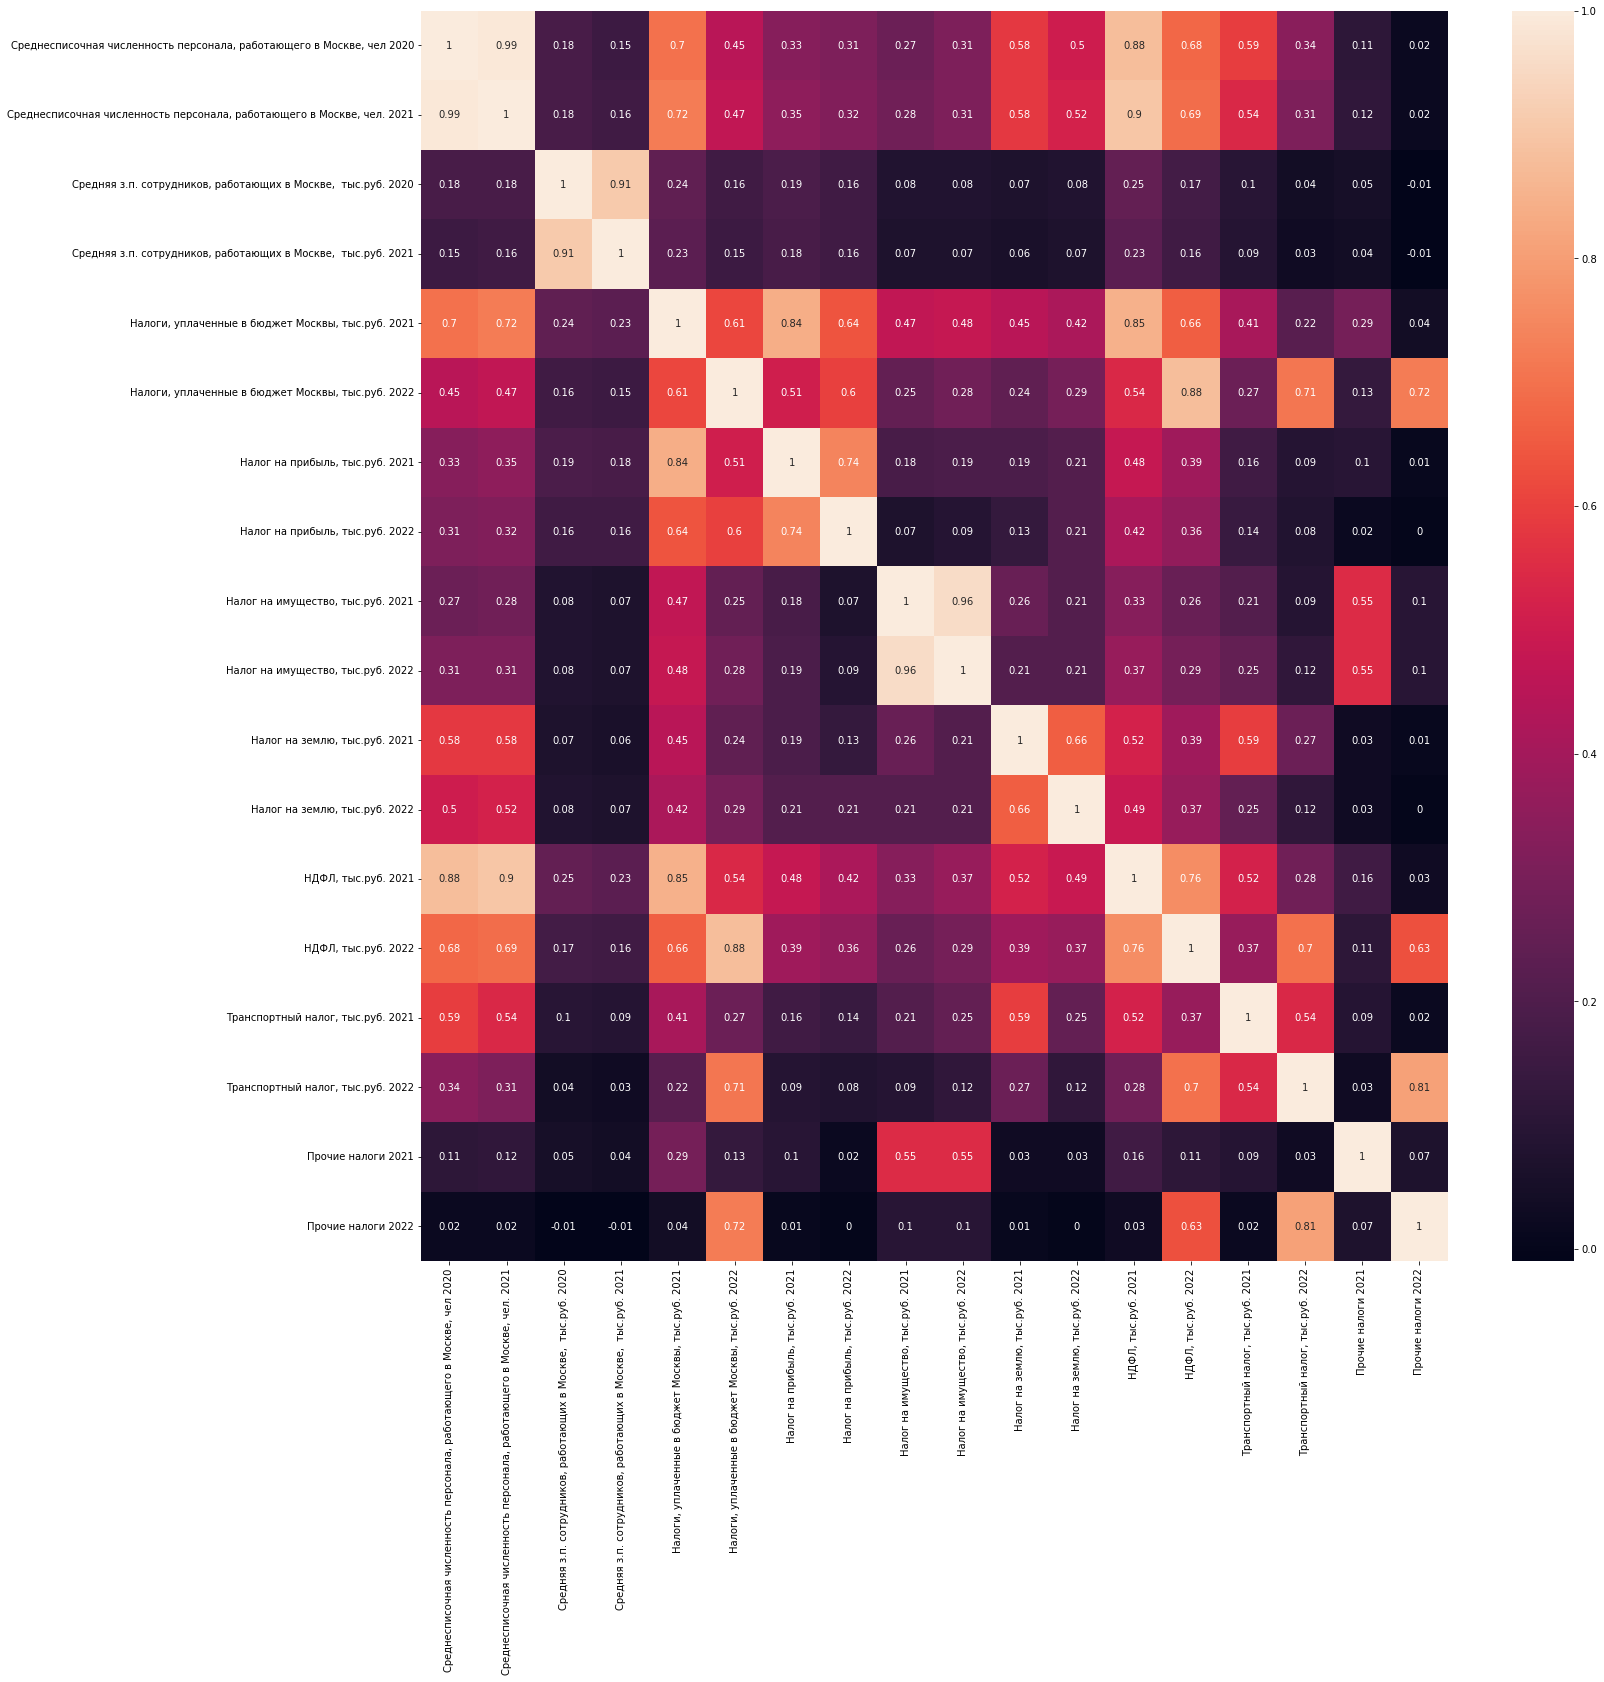

In [10]:
corr_map = final.corr().round(2)
plt.figure(figsize=(23,23))
plot = sns.heatmap(corr_map, annot=True)
fig = plot.get_figure()
fig.savefig("out.pdf") 

In [147]:
final

,"Среднесписочная численность персонала, работающего в Москве, чел 2020","Среднесписочная численность персонала, работающего в Москве, чел. 2021","Средняя з.п. сотрудников, работающих в Москве, тыс.руб. 2020","Средняя з.п. сотрудников, работающих в Москве, тыс.руб. 2021","Налоги, уплаченные в бюджет Москвы, тыс.руб. 2021","Налоги, уплаченные в бюджет Москвы, тыс.руб. 2022","Налог на прибыль, тыс.руб. 2021","Налог на прибыль, тыс.руб. 2022","Налог на имущество, тыс.руб. 2021","Налог на имущество, тыс.руб. 2022","Налог на землю, тыс.руб. 2021","Налог на землю, тыс.руб. 2022","НДФЛ, тыс.руб. 2021","НДФЛ, тыс.руб. 2022","Транспортный налог, тыс.руб. 2021","Транспортный налог, тыс.руб. 2022",Прочие налоги 2021,Прочие налоги 2022
0,3341.306475,3281.812175,81.940227,85.596010,7.946819e+05,919608.17060,105864.199000,2.702149e+05,34989.812,41792.75174,3093.1350,3094.45800,6.341681e+05,5.760175e+05,1365.86731,119.18775,15200.81226,28369.44464
1,10286.000000,10142.000000,81.400000,96.400000,1.713044e+06,137776.92330,0.000000,1.010101e+06,78306.000,104577.14420,52676.0000,40470.70800,1.580410e+06,1.364132e+06,1652.00000,1836.37300,0.00000,20681.08086
2,4112.000000,3773.000000,66.200263,67.662027,5.061124e+05,837049.23020,69642.303710,4.607952e+05,4448.621,6950.94897,0.0000,0.00000,4.146210e+05,3.581101e+05,474.79100,479.28039,16925.67975,10713.73676
3,2424.000000,2452.000000,76.513000,82.151000,3.739465e+05,399359.04830,16308.897000,1.161988e+05,11393.425,24043.45400,0.0000,0.00000,3.052858e+05,2.380282e+05,2680.00000,1226.98800,38278.37944,19861.61833
4,9204.250000,7439.000000,90.725492,97.544685,1.295545e+06,955669.26630,15.567334,1.010101e+06,123054.694,108917.79120,135848.7699,12721.92924,1.014972e+06,8.175722e+05,20434.11800,17406.83467,1220.54871,34602.20825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708,7.083333,9.500000,115.717788,110.405895,1.636215e+03,1444.46430,0.000000,6.552100e+01,0.000,0.00000,0.0000,0.00000,1.636215e+03,1.378943e+03,0.00000,0.00000,0.00000,0.00000
3709,11.916667,9.083333,73.388763,119.751756,2.760767e+03,1862.65672,0.000000,0.000000e+00,0.000,0.00000,0.0000,0.00000,1.786767e+03,1.615826e+03,0.00000,0.00000,974.00000,246.83032
3710,5.750000,3.500000,53.631529,41.130877,1.172941e+03,1409.28122,0.000000,0.000000e+00,0.000,908.32868,0.0000,0.00000,1.147800e+03,4.636799e+02,7.14077,8.05963,18.00000,29.21300
3711,6.333333,8.500000,18.966581,15.385700,2.043260e+02,519.67530,22.462000,2.586040e+02,0.000,0.00000,0.0000,0.00000,1.818640e+02,2.610713e+02,0.00000,0.00000,0.00000,0.00000


In [157]:
for_sum = final.iloc[:200, [7,9,11,13,15,17]].apply(pd.to_numeric).agg(sum, axis=1)

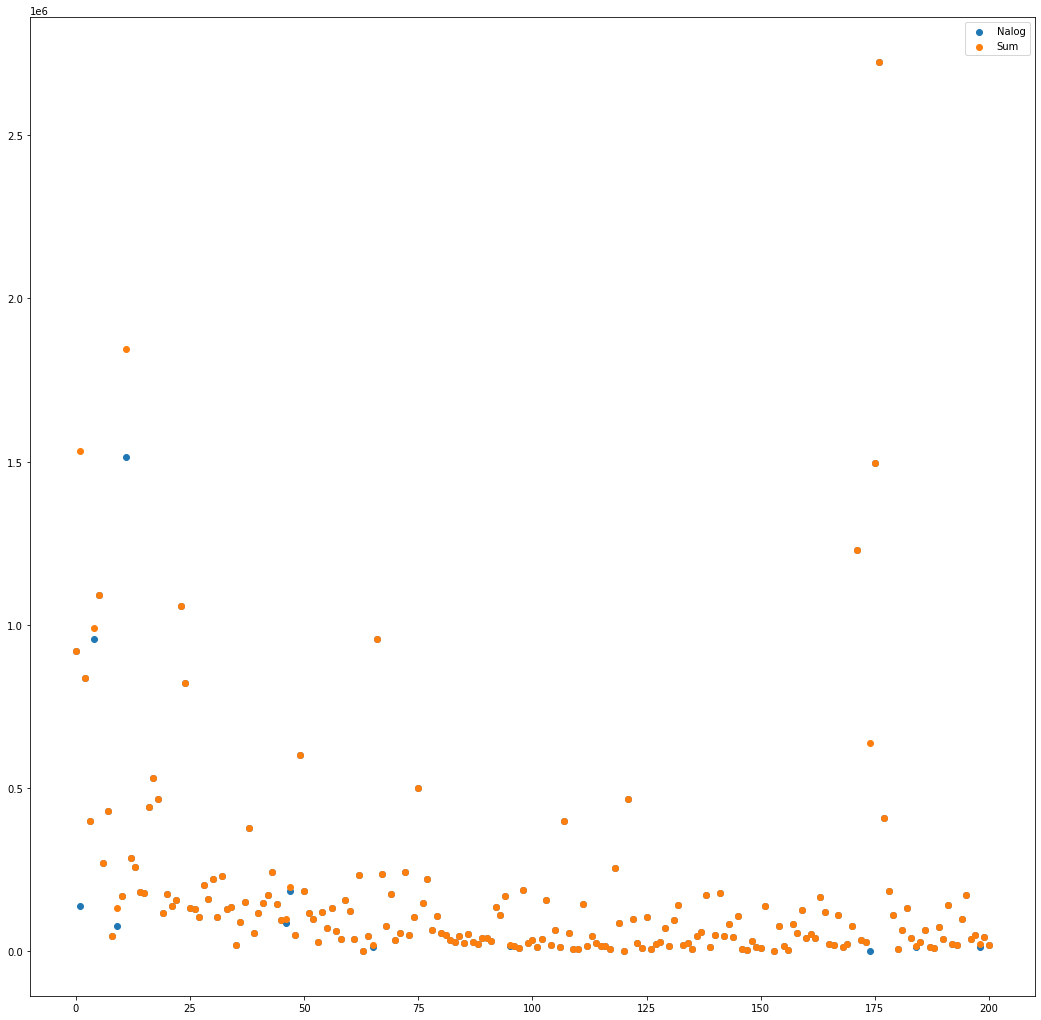

In [158]:
plt.figure(figsize=(18,18))
plt.scatter(final.iloc[:200, 5].index, final.iloc[:200, 5], label='Nalog')
plt.scatter(for_sum.index, for_sum, label='Sum')
plt.legend()
plt.show()

In [11]:
dataframe_main.iloc[:, 2:] = dataframe_main.iloc[:, 2:].apply(pd.to_numeric)

In [12]:
dataframe_main['Salary_forall'] = dataframe_main.iloc[:, 3]\
* dataframe_main.iloc[:, 5]
dataframe_main['Sum_partly'] = dataframe_main.iloc[:, [9,10,12,14,16]].apply(pd.to_numeric).agg(sum, axis=1)
dataframe_main['Full_sum'] = dataframe_main['Salary_forall']  + dataframe_main['Sum_partly']


In [7]:
dataframe_main.iloc[:, 2:] = dataframe_main.iloc[:, 2:].apply(pd.to_numeric)
dataframe_main

,Основная отрасль,Подотрасль промышленности,"Среднесписочная численность персонала, работающего в Москве, чел 2020","Среднесписочная численность персонала, работающего в Москве, чел. 2021","Средняя з.п. сотрудников, работающих в Москве, тыс.руб. 2020","Средняя з.п. сотрудников, работающих в Москве, тыс.руб. 2021","Налоги, уплаченные в бюджет Москвы, тыс.руб. 2021","Налоги, уплаченные в бюджет Москвы, тыс.руб. 2022","Налог на прибыль, тыс.руб. 2021","Налог на прибыль, тыс.руб. 2022","Налог на имущество, тыс.руб. 2021","Налог на имущество, тыс.руб. 2022","Налог на землю, тыс.руб. 2021","Налог на землю, тыс.руб. 2022","НДФЛ, тыс.руб. 2021","НДФЛ, тыс.руб. 2022","Транспортный налог, тыс.руб. 2021","Транспортный налог, тыс.руб. 2022",Прочие налоги 2021,Прочие налоги 2022
0,Пищевая промышленность,Молочная отрасль,3341.306475,3281.812175,81.940227,85.59601,794681.8801,919608.1706,105864.199,270214.857,34989.812,41792.75174,3093.135,3094.458,634168.0545,576017.4715,1365.86731,119.18775,15200.81226,28369.44464
1,Радиоэлектроника и приборостроение,Приборостроение,10286.0,10142.0,81.4,96.4,1713044.0,137776.9233,0.0,0.0,78306.0,104577.1442,52676.0,40470.708,1580410.0,1364131.861,1652.0,1836.373,0.0,20681.08086
2,Пищевая промышленность,Мясная отрасль,4112.0,3773.0,66.200263,67.662027,506112.4034,837049.2302,69642.30371,460795.1905,4448.621,6950.94897,0.0,0.0,414621.008,358110.0736,474.791,479.28039,16925.67975,10713.73676
3,Пищевая промышленность,Мясная отрасль,2424.0,2452.0,76.513,82.151,373946.5288,399359.0483,16308.897,116198.753,11393.425,24043.454,0.0,0.0,305285.8274,238028.235,2680.0,1226.988,38278.37944,19861.61833
4,Авиационная промышленность,Сведения отсутствуют,9204.25,7439.0,90.725492,97.544685,1295545.487,955669.2663,15.567334,0.0,123054.694,108917.7912,135848.7699,12721.92924,1014971.789,817572.1879,20434.118,17406.83467,1220.54871,34602.20825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708,Производство прочих товаров народного потребления,Сведения отсутствуют,7.083333,9.5,115.717788,110.405895,1636.215,1444.4643,0.0,65.521,0.0,0.0,0.0,0.0,1636.215,1378.9433,0.0,0.0,0.0,0.0
3709,Фармацевтическая промышленность,Сведения отсутствуют,11.916667,9.083333,73.388763,119.751756,2760.767,1862.65672,0.0,0.0,0.0,0.0,0.0,0.0,1786.767,1615.8264,0.0,0.0,974.0,246.83032
3710,Металлургия и металлообработка,Сведения отсутствуют,5.75,3.5,53.631529,41.130877,1172.94121,1409.28122,0.0,0.0,0.0,908.32868,0.0,0.0,1147.80044,463.67991,7.14077,8.05963,18.0,29.213
3711,Производство прочих товаров народного потребления,Сведения отсутствуют,6.333333,8.5,18.966581,15.3857,204.326,519.6753,22.462,258.604,0.0,0.0,0.0,0.0,181.864,261.0713,0.0,0.0,0.0,0.0


In [20]:
dataframe_main['Основная отрасль'].unique()

array(['Пищевая промышленность', 'Радиоэлектроника и приборостроение',
       'Авиационная промышленность', 'Автомобильная промышленность',
       'Общее машиностроение (в т.ч. оборудование пищевой переработки, дорожногстроительная и сельскохозяйственная техника)',
       'Легкая промышленность', 'Производство кокса и нефтепродуктов',
       'Химическая промышленность',
       'Производство строительных материалов',
       'Производство оружия, боеприпасов, спецхимии, военных машин',
       'Фармацевтическая промышленность',
       'Топливно-энергетический комплекс', 'Медицинская промышленность',
       'Кабельная промышленность', 'Деревообрабатывающая',
       'Металлургия и металлообработка', 'Полиграфическая деятельность',
       'Производство прочих товаров народного потребления',
       'Производство напитков', 'Научная деятельность',
       'Станкоинструментальная промышленность', 'Судостроение',
       'Производство ж/д транспорта',
       'Производство бытовой электроники и эле

In [43]:
import os

directory = './'
all_tools_machinery = []

for file in tqdm(os.listdir(directory)):
    dic = {}
    filename = os.fsdecode(file)
    if filename.endswith(".jsonl"): 
        dummy = []
        # print(os.path.join(directory, filename))
        for line in open(os.path.join(directory, filename), 'r'):
            price = json.loads(line)['price'].split('-')
            for p in price:
                try:
                    dummy.append(float(p.strip()))
                except:
                    dummy.append(float(p.replace(' ', '').strip()))
        dic[filename] = dummy
        all_tools_machinery.append(dic)
    else:
        continue

  0%|          | 0/31 [00:00<?, ?it/s]

In [44]:
all_tools_machinery

[{'electronic_ob.jsonl': [7300.0,
   7500.0,
   80000.0,
   98000.0,
   22000.0,
   76800.0,
   23000.0,
   76900.0,
   11300.0,
   11500.0,
   2499.0,
   40000.0,
   45000.0,
   80000.0,
   90000.0,
   1000.0,
   3000.0,
   11300.0,
   11500.0,
   80000.0,
   100000.0,
   13000.0,
   20000.0,
   0.19,
   2.59,
   0.8,
   1.2,
   75000.0,
   4700.0,
   7439.0,
   7499.0,
   14000.0,
   20000.0,
   75.0,
   143.0,
   220.0,
   240.0,
   0.52,
   1.0,
   0.1,
   3.0,
   0.1,
   10.0,
   11500.0,
   1.2,
   10.0,
   98000.0,
   180000.0,
   0.5,
   1.3,
   0.4,
   2.1,
   0.3,
   0.5,
   0.5,
   1.0,
   0.1,
   5.0,
   0.8,
   1.3,
   0.4,
   1.0,
   3.0,
   50.0,
   2.0,
   14700.0,
   18000.0,
   580.0,
   620.0,
   1450.0,
   4999.0,
   5199.0,
   7300.0,
   7500.0,
   80000.0,
   98000.0,
   22000.0,
   76800.0,
   23000.0,
   76900.0,
   11300.0,
   11500.0,
   2499.0,
   40000.0,
   45000.0,
   80000.0,
   90000.0,
   1000.0,
   3000.0,
   11300.0,
   11500.0,
   80000.0,
   100000.

In [37]:
dataframe_main['Основная отрасль'].unique()

array(['Пищевая промышленность', 'Радиоэлектроника и приборостроение',
       'Авиационная промышленность', 'Автомобильная промышленность',
       'Общее машиностроение (в т.ч. оборудование пищевой переработки, дорожногстроительная и сельскохозяйственная техника)',
       'Легкая промышленность', 'Производство кокса и нефтепродуктов',
       'Химическая промышленность',
       'Производство строительных материалов',
       'Производство оружия, боеприпасов, спецхимии, военных машин',
       'Фармацевтическая промышленность',
       'Топливно-энергетический комплекс', 'Медицинская промышленность',
       'Кабельная промышленность', 'Деревообрабатывающая',
       'Металлургия и металлообработка', 'Полиграфическая деятельность',
       'Производство прочих товаров народного потребления',
       'Производство напитков', 'Научная деятельность',
       'Станкоинструментальная промышленность', 'Судостроение',
       'Производство ж/д транспорта',
       'Производство бытовой электроники и эле

In [45]:
i = 0
for line in all_tools_machinery:
    print(line.keys(), i)
    i += 1

dict_keys(['electronic_ob.jsonl']) 0
dict_keys(['woodworking.jsonl']) 1
dict_keys(['WeldingMachines.jsonl']) 2
dict_keys(['RubberPlastic.jsonl']) 3
dict_keys(['RefrgHeatEq.jsonl']) 4
dict_keys(['ProductionLine .jsonl']) 5
dict_keys(['PaperProduction.jsonl']) 6
dict_keys(['PackagingMachines.jsonl']) 7
dict_keys(['OtherMachinery.jsonl']) 8
dict_keys(['MetalnMetallurgy.jsonl']) 9
dict_keys(['MachineTool.jsonl']) 10
dict_keys(['MachineryAcessories.jsonl']) 11
dict_keys(['IndustrialRobots.jsonl']) 12
dict_keys(['HomeProduct.jsonl']) 13
dict_keys(['Food.jsonl']) 14
dict_keys(['EnvirnMachinery.jsonl']) 15
dict_keys(['ElecProducts.jsonl']) 16
dict_keys(['CleaningEqpm.jsonl']) 17
dict_keys(['ChemicalnPharmaceutical.jsonl']) 18
dict_keys(['AutonPlanepart2 .jsonl']) 19
dict_keys(['AutonPlanepart1 .jsonl']) 20
dict_keys(['ApparelnTextile .jsonl']) 21
dict_keys(['Agriculture.jsonl']) 22


In [61]:
all_types_dic = {
    'Пищевая промышленность' : np.array(all_tools_machinery[14]['Food.jsonl'] + all_tools_machinery[17]['CleaningEqpm.jsonl']),
    'Радиоэлектроника и приборостроение': np.array(all_tools_machinery[0]['electronic_ob.jsonl'] + 
                                              all_tools_machinery[16]['ElecProducts.jsonl'] +
                                              all_tools_machinery[17]['CleaningEqpm.jsonl']    ),
    'Авиационная промышленность': np.array(all_tools_machinery[5]['ProductionLine .jsonl'] + 
                                         all_tools_machinery[10]['MachineTool.jsonl'] + 
                                        all_tools_machinery[19]['AutonPlanepart2 .jsonl'] + 
                                         all_tools_machinery[20]['AutonPlanepart1 .jsonl'] +
                                          all_tools_machinery[12]['IndustrialRobots.jsonl']), 
    'Автомобильная промышленность': np.array(all_tools_machinery[5]['ProductionLine .jsonl'] + 
                                         all_tools_machinery[10]['MachineTool.jsonl'] + 
                                        all_tools_machinery[19]['AutonPlanepart2 .jsonl'] + 
                                         all_tools_machinery[20]['AutonPlanepart1 .jsonl'] +
                                            all_tools_machinery[12]['IndustrialRobots.jsonl']), 
    'Общее машиностроение (в т.ч. оборудование пищевой переработки, дорожногстроительная и сельскохозяйственная техника)':
    np.array(all_tools_machinery[10]['MachineTool.jsonl'] + 
            all_tools_machinery[22]['Agriculture.jsonl'] + 
            all_tools_machinery[5]['ProductionLine .jsonl'] + 
            all_tools_machinery[19]['AutonPlanepart2 .jsonl'] + 
             all_tools_machinery[20]['AutonPlanepart1 .jsonl'] + 
            all_tools_machinery[3]['RubberPlastic.jsonl']), 
    'Легкая промышленность': np.array(all_tools_machinery[21]['ApparelnTextile .jsonl'] + 
                                    all_tools_machinery[17]['CleaningEqpm.jsonl']  ),
    'Производство кокса и нефтепродуктов': np.array(all_tools_machinery[18]['ChemicalnPharmaceutical.jsonl'] + 
                                       all_tools_machinery[3]['RubberPlastic.jsonl']),
    
    'Химическая промышленность': np.array(all_tools_machinery[18]['ChemicalnPharmaceutical.jsonl']),
    
    'Производство строительных материалов': np.array(all_tools_machinery[10]['MachineTool.jsonl'] + 
                                        all_tools_machinery[2]['WeldingMachines.jsonl']),
    
    'Производство оружия, боеприпасов, спецхимии, военных машин': np.array(all_tools_machinery[5]['ProductionLine .jsonl'] +
                                                           all_tools_machinery[10]['MachineTool.jsonl'] +
                                                            all_tools_machinery[2]['WeldingMachines.jsonl'] +
                                                             all_tools_machinery[11]['MachineryAcessories.jsonl']),
    'Фармацевтическая промышленность': np.array(all_tools_machinery[18]['ChemicalnPharmaceutical.jsonl']),
    'Топливно-энергетический комплекс': np.array(all_tools_machinery[18]['ChemicalnPharmaceutical.jsonl'] + 
                                   all_tools_machinery[3]['RubberPlastic.jsonl'] + 
                                     all_tools_machinery[15]['EnvirnMachinery.jsonl']),
    'Медицинская промышленность': np.array(all_tools_machinery[10]['MachineTool.jsonl'] +
                                    all_tools_machinery[2]['WeldingMachines.jsonl'] +
                                          all_tools_machinery[18]['ChemicalnPharmaceutical.jsonl'] + 
                                          all_tools_machinery[4]['RefrgHeatEq.jsonl']),
    
    'Кабельная промышленность': np.array(all_tools_machinery[3]['RubberPlastic.jsonl'] + 
                                  all_tools_machinery[9]['MetalnMetallurgy.jsonl']      ),
    'Деревообрабатывающая': np.array(all_tools_machinery[1]['woodworking.jsonl']),
    'Металлургия и металлообработка': np.array(all_tools_machinery[9]['MetalnMetallurgy.jsonl']),
    'Полиграфическая деятельность': np.array(all_tools_machinery[6]['PaperProduction.jsonl']),
    'Производство прочих товаров народного потребления': np.array(all_tools_machinery[13]['HomeProduct.jsonl']),
    'Производство напитков': np.array(all_tools_machinery[7]['PackagingMachines.jsonl'] + 
                                   all_tools_machinery[15]['EnvirnMachinery.jsonl']  ),
    'Научная деятельность': np.array(all_tools_machinery[0]['electronic_ob.jsonl'] +
                                    all_tools_machinery[10]['MachineTool.jsonl'] + 
                                    all_tools_machinery[12]['IndustrialRobots.jsonl']),
    'Станкоинструментальная промышленность': np.array(all_tools_machinery[10]['MachineTool.jsonl'] + 
                                        all_tools_machinery[2]['WeldingMachines.jsonl'] + 
                                                     all_tools_machinery[9]['MetalnMetallurgy.jsonl']),
    'Судостроение': np.array(all_tools_machinery[5]['ProductionLine .jsonl'] + 
                                         all_tools_machinery[10]['MachineTool.jsonl'] + 
                                        all_tools_machinery[19]['AutonPlanepart2 .jsonl'] + 
                                         all_tools_machinery[20]['AutonPlanepart1 .jsonl'] +
                           all_tools_machinery[2]['WeldingMachines.jsonl'] ), 
    'Производство ж/д транспорта': np.array(all_tools_machinery[5]['ProductionLine .jsonl'] + 
                                         all_tools_machinery[10]['MachineTool.jsonl'] + 
                                        all_tools_machinery[19]['AutonPlanepart2 .jsonl'] + 
                                         all_tools_machinery[20]['AutonPlanepart1 .jsonl'] +
                           all_tools_machinery[2]['WeldingMachines.jsonl'] ),
    'Производство бытовой электроники и электрических приборов': np.array(all_tools_machinery[16]['ElecProducts.jsonl'] ),
    'Аддитивные технологии': np.array(all_tools_machinery[8]['OtherMachinery.jsonl'])
}

In [62]:
all_types_dic

{'Пищевая промышленность': array([ 2000., 60000.,  2350., ...,  6300.,   165.,   189.]),
 'Радиоэлектроника и приборостроение': array([ 7300.,  7500., 80000., ...,  6300.,   165.,   189.]),
 'Авиационная промышленность': array([200000.,  14000.,   5220., ...,  20000.,   9000.,  12000.]),
 'Автомобильная промышленность': array([200000.,  14000.,   5220., ...,  20000.,   9000.,  12000.]),
 'Общее машиностроение (в т.ч. оборудование пищевой переработки, дорожногстроительная и сельскохозяйственная техника)': array([ 5600.,  7600., 39000., ..., 12000., 45000., 50000.]),
 'Легкая промышленность': array([40000., 18200., 19800., ...,  6300.,   165.,   189.]),
 'Производство кокса и нефтепродуктов': array([29500., 30000.,  2800., ..., 12000., 45000., 50000.]),
 'Химическая промышленность': array([29500.  , 30000.  ,  2800.  , ..., 14555.55,  3000.  ,  8000.  ]),
 'Производство строительных материалов': array([ 5600.,  7600., 39000., ..., 28500.,  3999.,  5500.]),
 'Производство оружия, боеприпа

In [78]:
data_of_equip = []
for i in [15,50,100]:
    for line in all_types_dic:
        dic = {}
        dic['Основная отрасль'] = line
        dic['Cумма затрат на оборудование тыс.руб.'] = sum(np.random.choice(all_types_dic[line], i) * 78) /1000
        dic['Кол-во единиц'] = i
        data_of_equip.append(dic)

In [79]:
data_of_equip

[{'Основная отрасль': 'Пищевая промышленность',
  'Cумма затрат на оборудование тыс.руб.': 4417.608,
  'Кол-во единиц': 15},
 {'Основная отрасль': 'Радиоэлектроника и приборостроение',
  'Cумма затрат на оборудование тыс.руб.': 33343.2918,
  'Кол-во единиц': 15},
 {'Основная отрасль': 'Авиационная промышленность',
  'Cумма затрат на оборудование тыс.руб.': 59439.12,
  'Кол-во единиц': 15},
 {'Основная отрасль': 'Автомобильная промышленность',
  'Cумма затрат на оборудование тыс.руб.': 58337.682,
  'Кол-во единиц': 15},
 {'Основная отрасль': 'Общее машиностроение (в т.ч. оборудование пищевой переработки, дорожногстроительная и сельскохозяйственная техника)',
  'Cумма затрат на оборудование тыс.руб.': 52406.25,
  'Кол-во единиц': 15},
 {'Основная отрасль': 'Легкая промышленность',
  'Cумма затрат на оборудование тыс.руб.': 11815.9002,
  'Кол-во единиц': 15},
 {'Основная отрасль': 'Производство кокса и нефтепродуктов',
  'Cумма затрат на оборудование тыс.руб.': 13419.978,
  'Кол-во единиц

In [80]:
dataframe_stanki_full = pd.DataFrame(data_of_equip)

In [81]:
dataframe_stanki_full

,Основная отрасль,Cумма затрат на оборудование тыс.руб.,Кол-во единиц
0,Пищевая промышленность,4417.60800,15
1,Радиоэлектроника и приборостроение,33343.29180,15
2,Авиационная промышленность,59439.12000,15
3,Автомобильная промышленность,58337.68200,15
4,Общее машиностроение (в т.ч. оборудование пище...,52406.25000,15
...,...,...,...
70,Станкоинструментальная промышленность,155551.10298,100
71,Судостроение,201605.34420,100
72,Производство ж/д транспорта,306363.08118,100
73,Производство бытовой электроники и электрическ...,153231.85800,100


In [67]:
np.random.choice(all_types_dic[line], 100) * 78

array([3.2760000e+05, 7.8000000e+06, 2.4960000e+05, 8.5800000e+06,
       7.0200000e+04, 3.9000000e+06, 6.8533920e+06, 2.0904000e+06,
       6.9332640e+06, 3.1200000e+05, 3.2760000e+05, 3.5100000e+06,
       3.2760000e+04, 6.9331860e+06, 9.3600000e+06, 7.8000000e+07,
       1.1700000e+06, 2.3400000e+06, 5.8500000e+06, 2.0280000e+03,
       6.8533920e+06, 9.3600000e+06, 2.8860000e+05, 7.8000000e+06,
       1.5600000e+06, 1.5600000e+06, 2.4180000e+06, 5.7556200e+05,
       2.8860000e+05, 2.4180000e+06, 4.9530000e+05, 9.5940000e+06,
       7.8000000e+05, 2.8080000e+05, 1.5600000e+06, 3.6145200e+05,
       9.3600000e+06, 5.6189250e+05, 2.0904000e+06, 1.5600000e+06,
       6.8533920e+06, 2.5740000e+04, 7.6432200e+06, 4.2003000e+05,
       2.3400000e+03, 5.1400440e+06, 1.8720000e+07, 2.4960000e+06,
       4.6425600e+05, 1.5600000e+06, 3.0420000e+05, 9.5940000e+06,
       7.0200000e+06, 9.3600000e+06, 6.8533920e+06, 3.1200000e+05,
       1.7160000e+06, 7.0200000e+04, 6.9332640e+06, 1.5600000e

/home/jovyan/.imgenv-jupyter-alaskarov4-0/lib/python3.7/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/jovyan/.imgenv-jupyter-alaskarov4-0/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/home/jovyan/.imgenv-jupyter-alaskarov4-0/lib/python3.7/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/jovyan/.imgenv-jupyter-alaskarov4-0/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot

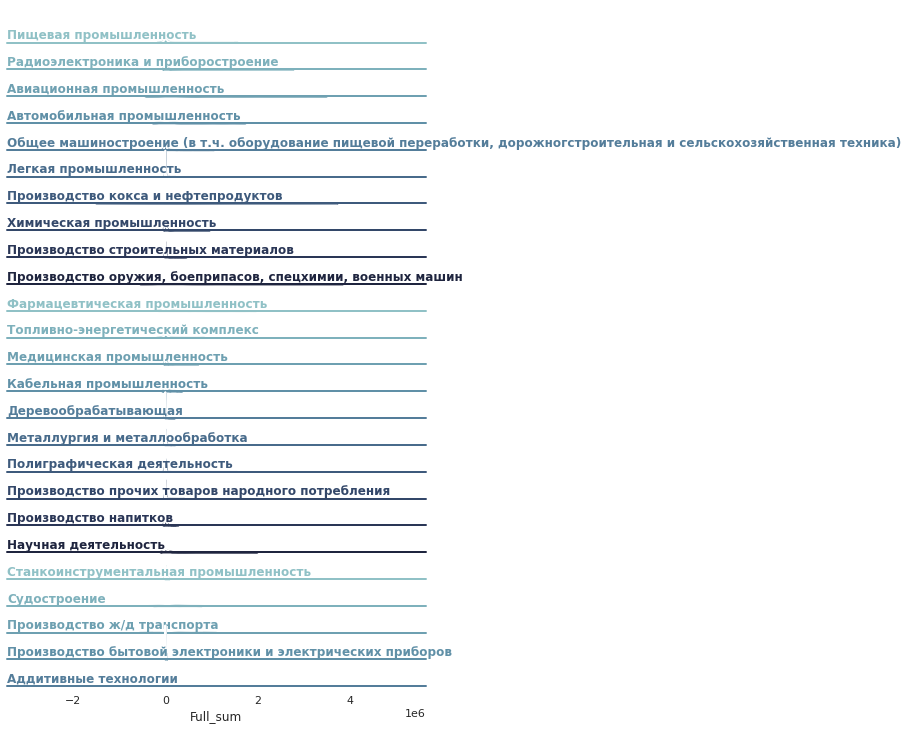

In [196]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(dataframe_main, row="Основная отрасль", hue="Основная отрасль", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "Full_sum",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map_dataframe(sns.kdeplot, x="Full_sum")
g.map(sns.kdeplot, "Full_sum", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Full_sum")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

/home/jovyan/.imgenv-jupyter-alaskarov4-0/lib/python3.7/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/jovyan/.imgenv-jupyter-alaskarov4-0/lib/python3.7/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/jovyan/.imgenv-jupyter-alaskarov4-0/lib/python3.7/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1440x1440 with 0 Axes>

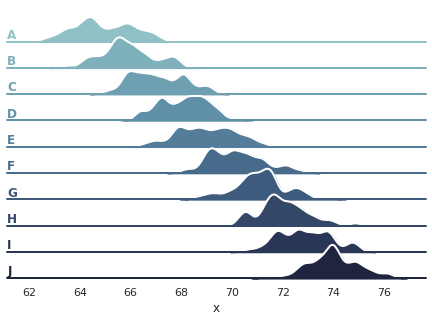

In [186]:
plt.figure(figsize=(20,20))
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Пищевая промышленность'),
  Text(1, 0, 'Радиоэлектроника и приборостроение'),
  Text(2, 0, 'Авиационная промышленность'),
  Text(3, 0, 'Автомобильная промышленность'),
  Text(4, 0, 'Общее машиностроение (в т.ч. оборудование пищевой переработки, дорожногстроительная и сельскохозяйственная техника)'),
  Text(5, 0, 'Легкая промышленность'),
  Text(6, 0, 'Производство кокса и нефтепродуктов'),
  Text(7, 0, 'Химическая промышленность'),
  Text(8, 0, 'Производство строительных материалов'),
  Text(9, 0, 'Производство оружия, боеприпасов, спецхимии, военных машин'),
  Text(10, 0, 'Фармацевтическая промышленность'),
  Text(11, 0, 'Топливно-энергетический комплекс'),
  Text(12, 0, 'Медицинская промышленность'),
  Text(13, 0, 'Кабельная промышленность'),
  Text(14, 0, 'Деревообрабатывающая'),
  Text(15, 0, 'Металлургия и металлообработка'),
  Text(16, 0, 'Полиграфич

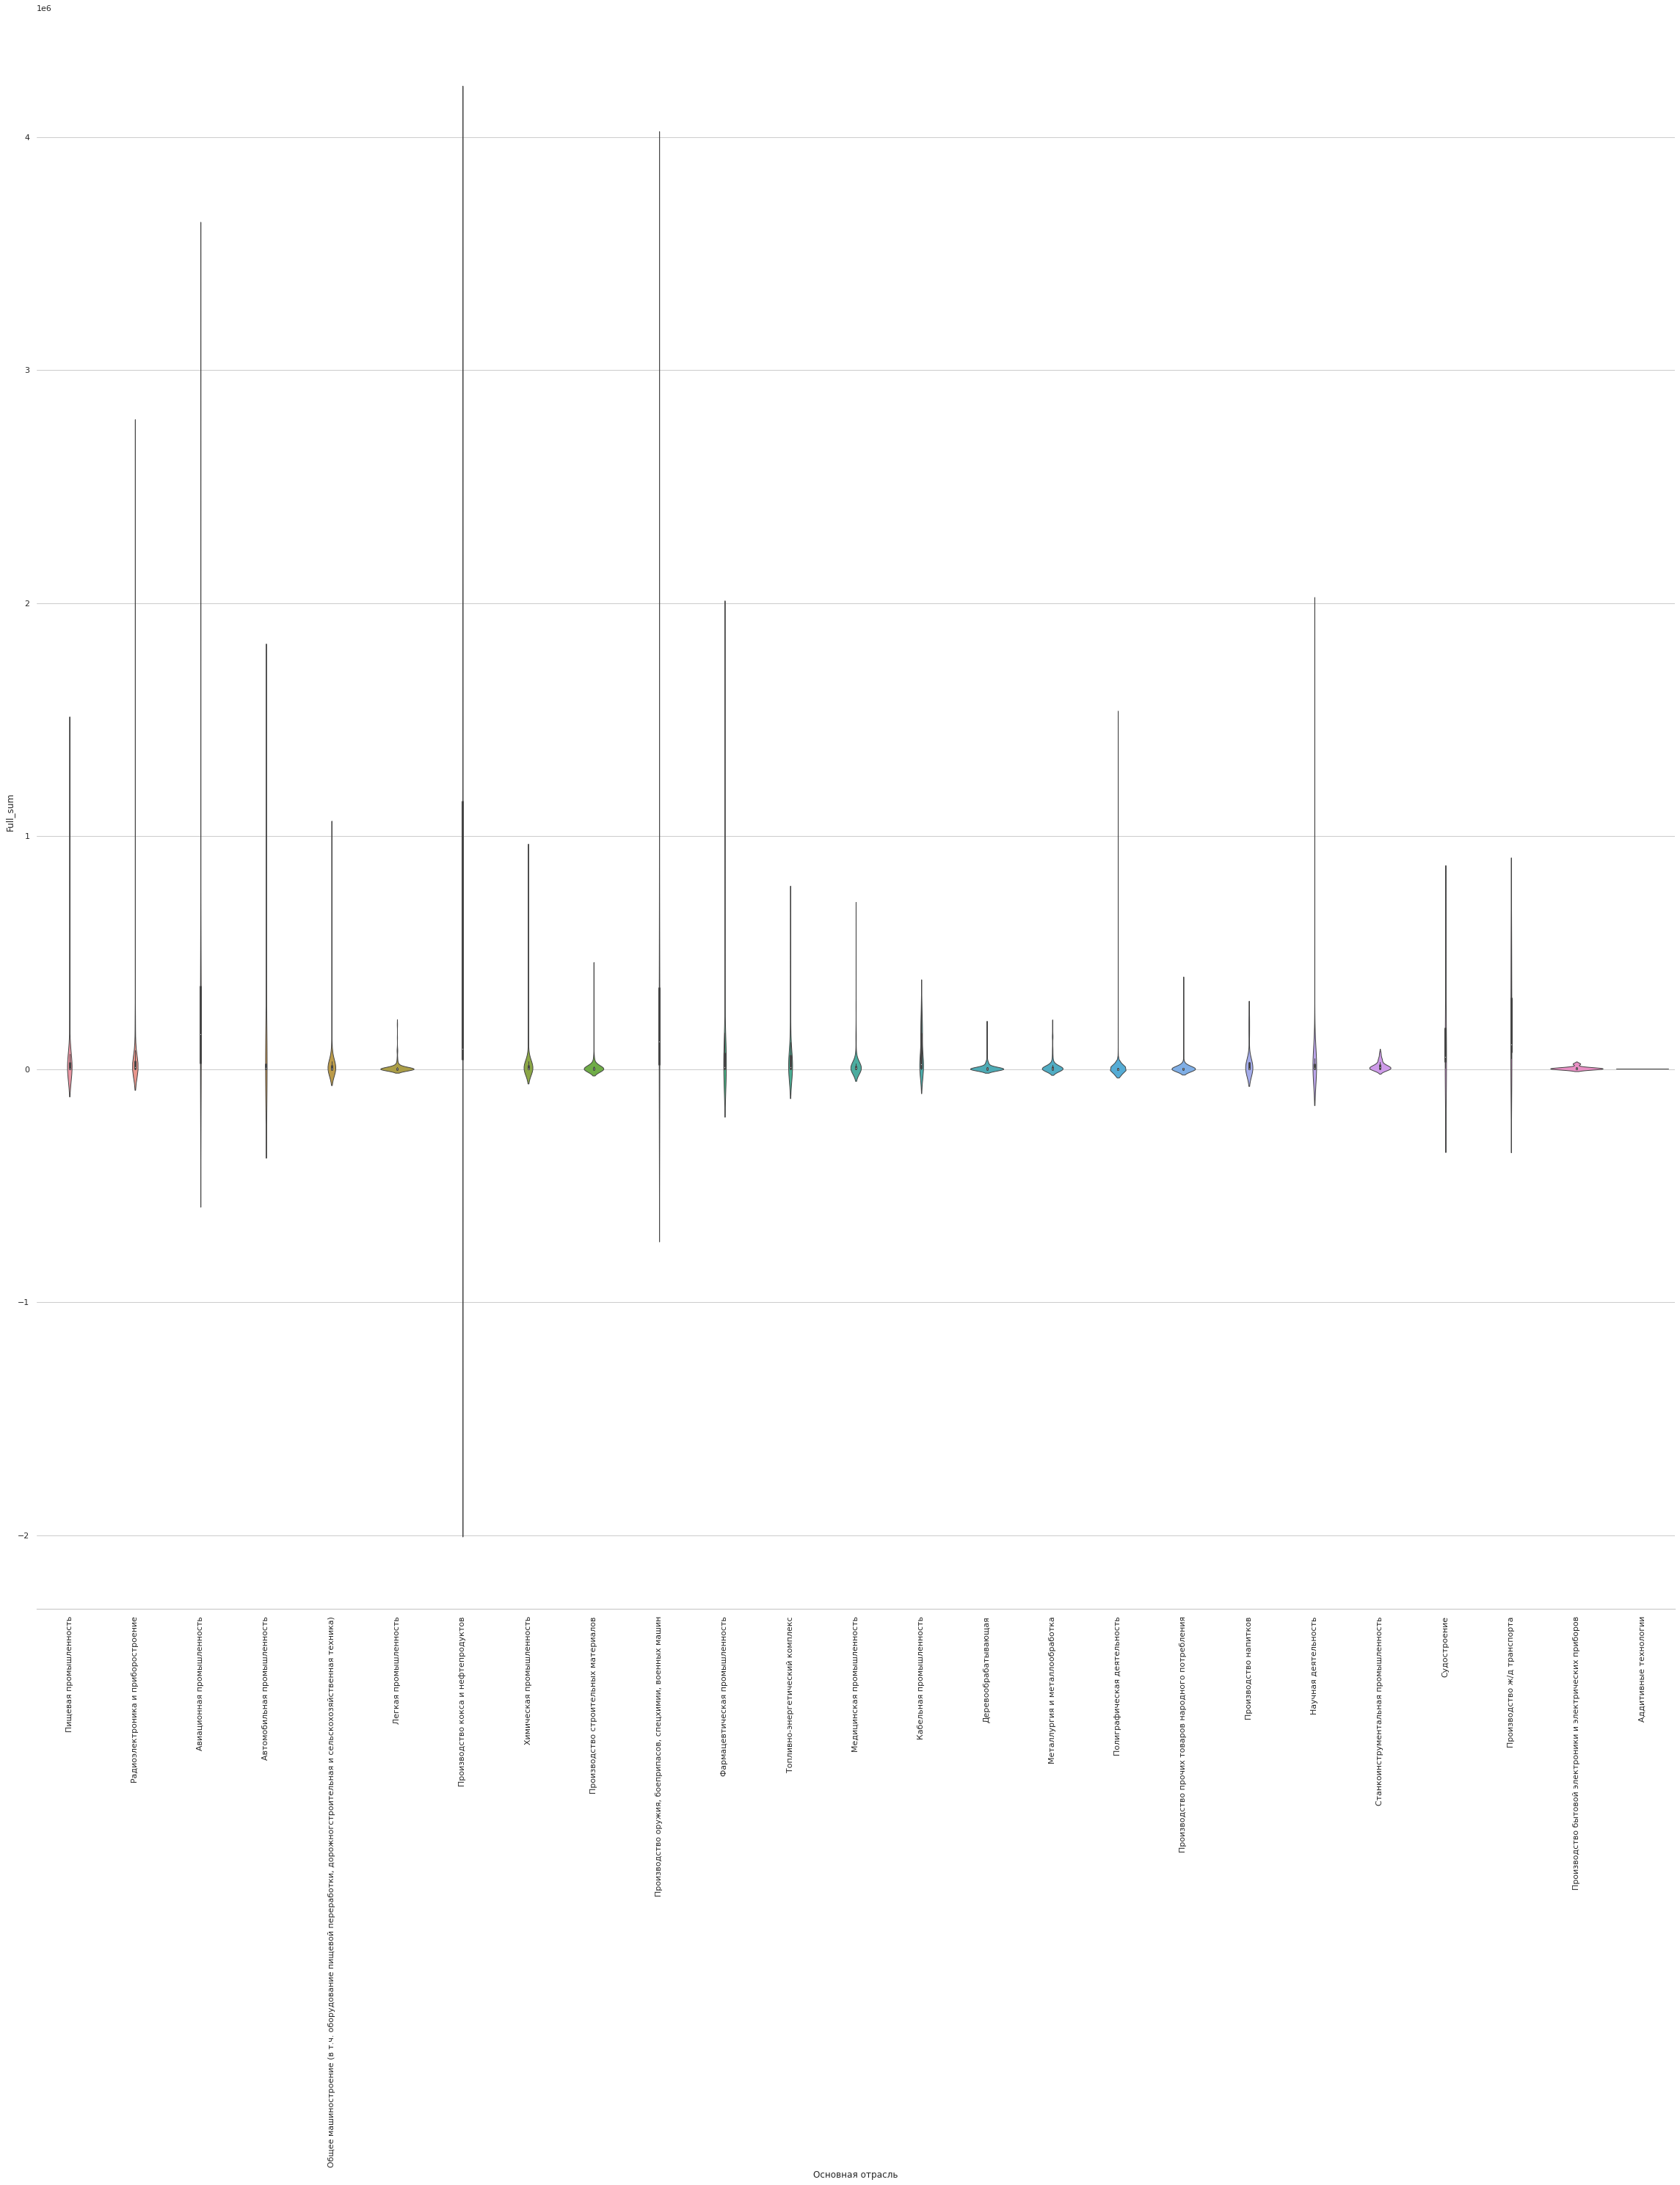

In [202]:
sns.set_theme(style="whitegrid")

# Load the example tips dataset
plt.figure(figsize=(40,40))

# Draw a nested violinplot and split the violins for easier comparison
g = sns.violinplot(data=dataframe_main, x="Основная отрасль", y="Full_sum", linewidth=1)
sns.despine(left=True)
plt.xticks(rotation=90)


In [195]:
dataframe_main['Full_sum']

0       1.224742e+06
1       2.690733e+06
2       1.135628e+06
3       6.369923e+05
4       2.019944e+06
            ...     
3708    2.750592e+03
3709    2.874512e+03
3710    1.298899e+03
3711    5.712464e+02
3712    1.944723e+02
Name: Full_sum, Length: 3713, dtype: float64

/home/jovyan/.imgenv-jupyter-alaskarov4-0/lib/python3.7/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)
/home/user/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  


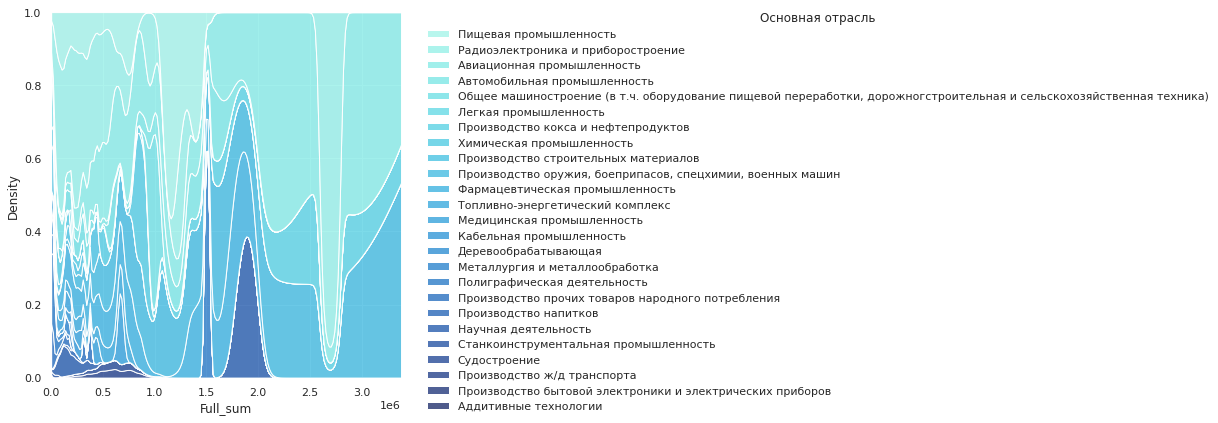

In [217]:

sns.displot(
    data=dataframe_main,
    x="Full_sum",ax=ax, hue="Основная отрасль",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=2,light=.85"
) 
sns.despine()


In [85]:
data_for_t = dataframe_main.iloc[:, [0,3,5,7,9,11,13,15,17,19]]

In [87]:
dic_to_change = {key: value for value, key in enumerate(data_for_t['Основная отрасль'].unique())}

In [88]:
data_for_t = pd.merge(data_for_t, dataframe_stanki_full, on='Основная отрасль')
data_for_t

,Основная отрасль,"Среднесписочная численность персонала, работающего в Москве, чел. 2021","Средняя з.п. сотрудников, работающих в Москве, тыс.руб. 2021","Налоги, уплаченные в бюджет Москвы, тыс.руб. 2022","Налог на прибыль, тыс.руб. 2022","Налог на имущество, тыс.руб. 2022","Налог на землю, тыс.руб. 2022","НДФЛ, тыс.руб. 2022","Транспортный налог, тыс.руб. 2022",Прочие налоги 2022,Cумма затрат на оборудование тыс.руб.,Кол-во единиц
0,Пищевая промышленность,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,4417.60800,15
1,Пищевая промышленность,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,18556.64460,50
2,Пищевая промышленность,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,67006.53960,100
3,Пищевая промышленность,3773.0,67.662027,837049.2302,460795.1905,6950.94897,0.0,358110.0736,479.28039,10713.73676,4417.60800,15
4,Пищевая промышленность,3773.0,67.662027,837049.2302,460795.1905,6950.94897,0.0,358110.0736,479.28039,10713.73676,18556.64460,50
...,...,...,...,...,...,...,...,...,...,...,...,...
11134,Производство бытовой электроники и электрическ...,7.583333,36.230836,173.01524,0.0,0.0,0.0,173.01524,0.0,0.0,57921.31800,50
11135,Производство бытовой электроники и электрическ...,7.583333,36.230836,173.01524,0.0,0.0,0.0,173.01524,0.0,0.0,153231.85800,100
11136,Аддитивные технологии,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,138091.02450,15
11137,Аддитивные технологии,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,185693.85042,50


In [89]:
data_for_t['Основная отрасль'] = data_for_t['Основная отрасль'].apply(lambda x: dic_to_change[x])

In [90]:
data_for_t.dropna(inplace=True)

In [91]:
data_for_t['Кадастровая стоимость имущества, тыс.руб. 2022'] = data_for_t['Налог на имущество, тыс.руб. 2022']/0.02

In [92]:
data_for_t['Кадастровая стоимость земли тыс.руб. 2022'] = data_for_t['Налог на землю, тыс.руб. 2022']/0.015

In [96]:
data_for_t

,Основная отрасль,"Среднесписочная численность персонала, работающего в Москве, чел. 2021","Средняя з.п. сотрудников, работающих в Москве, тыс.руб. 2021","Налоги, уплаченные в бюджет Москвы, тыс.руб. 2022","Налог на прибыль, тыс.руб. 2022","Налог на имущество, тыс.руб. 2022","Налог на землю, тыс.руб. 2022","НДФЛ, тыс.руб. 2022","Транспортный налог, тыс.руб. 2022",Прочие налоги 2022,Cумма затрат на оборудование тыс.руб.,Кол-во единиц,"Кадастровая стоимость имущества, тыс.руб. 2022",Кадастровая стоимость земли тыс.руб. 2022
0,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,4417.60800,15,2089637.587,206297.2
1,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,18556.64460,50,2089637.587,206297.2
2,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,67006.53960,100,2089637.587,206297.2
3,0,3773.0,67.662027,837049.2302,460795.1905,6950.94897,0.0,358110.0736,479.28039,10713.73676,4417.60800,15,347547.4485,0.0
4,0,3773.0,67.662027,837049.2302,460795.1905,6950.94897,0.0,358110.0736,479.28039,10713.73676,18556.64460,50,347547.4485,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11134,23,7.583333,36.230836,173.01524,0.0,0.0,0.0,173.01524,0.0,0.0,57921.31800,50,0.0,0.0
11135,23,7.583333,36.230836,173.01524,0.0,0.0,0.0,173.01524,0.0,0.0,153231.85800,100,0.0,0.0
11136,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,138091.02450,15,0.0,0.0
11137,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,185693.85042,50,0.0,0.0


In [97]:
data_for_t_copy = data_for_t.copy()
cadastr_lim = cadastr[['Адм.округ Москвы', 'Средн.кадастр.стоимость \n1 кв.м., руб.']]
data_for_t_copy['key'] = 1
cadastr_lim['key'] = 1
data_full_main = pd.merge(data_for_t_copy, cadastr_lim, on='key')
del data_full_main['key']
data_full_main  ##### MAIN DATASET




,Основная отрасль,"Среднесписочная численность персонала, работающего в Москве, чел. 2021","Средняя з.п. сотрудников, работающих в Москве, тыс.руб. 2021","Налоги, уплаченные в бюджет Москвы, тыс.руб. 2022","Налог на прибыль, тыс.руб. 2022","Налог на имущество, тыс.руб. 2022","Налог на землю, тыс.руб. 2022","НДФЛ, тыс.руб. 2022","Транспортный налог, тыс.руб. 2022",Прочие налоги 2022,Cумма затрат на оборудование тыс.руб.,Кол-во единиц,"Кадастровая стоимость имущества, тыс.руб. 2022",Кадастровая стоимость земли тыс.руб. 2022,Адм.округ Москвы,"Средн.кадастр.стоимость \n1 кв.м., руб."
0,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,4417.60800,15,2089637.587,206297.2,ВАО,"15 492,36"
1,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,4417.60800,15,2089637.587,206297.2,ЗАО,"11 703,22"
2,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,4417.60800,15,2089637.587,206297.2,ЗелАО,"4 111,50"
3,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,4417.60800,15,2089637.587,206297.2,НАО,"5 333,94"
4,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,4417.60800,15,2089637.587,206297.2,САО,"20 532,99"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127795,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,269962.39842,100,0.0,0.0,ТАО,"2 890,51"
127796,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,269962.39842,100,0.0,0.0,ЦАО,"63 274,79"
127797,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,269962.39842,100,0.0,0.0,ЮАО,"13 510,37"
127798,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,269962.39842,100,0.0,0.0,ЮВАО,"14 086,97"


In [104]:
data_full_main

,Основная отрасль,"Среднесписочная численность персонала, работающего в Москве, чел. 2021","Средняя з.п. сотрудников, работающих в Москве, тыс.руб. 2021","Налоги, уплаченные в бюджет Москвы, тыс.руб. 2022","Налог на прибыль, тыс.руб. 2022","Налог на имущество, тыс.руб. 2022","Налог на землю, тыс.руб. 2022","НДФЛ, тыс.руб. 2022","Транспортный налог, тыс.руб. 2022",Прочие налоги 2022,Cумма затрат на оборудование тыс.руб.,Кол-во единиц,"Кадастровая стоимость имущества, тыс.руб. 2022",Кадастровая стоимость земли тыс.руб. 2022,Адм.округ Москвы,"Средн.кадастр.стоимость \n1 кв.м., руб.",Возможная площадь кв.м.,Возможная площадь недвижимости кв.м.,Прибыль тыс.руб. 2022
0,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,4417.60800,15,2089637.587,206297.2,ВАО,15492.36,13316.060303,17413.646558,1351074.285
1,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,4417.60800,15,2089637.587,206297.2,ЗАО,11703.22,17627.388018,17413.646558,1351074.285
2,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,4417.60800,15,2089637.587,206297.2,ЗелАО,4111.50,50175.653654,17413.646558,1351074.285
3,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,4417.60800,15,2089637.587,206297.2,НАО,5333.94,38676.325568,17413.646558,1351074.285
4,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,4417.60800,15,2089637.587,206297.2,САО,20532.99,10047.109554,17413.646558,1351074.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127795,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,269962.39842,100,0.0,0.0,ТАО,2890.51,0.0,0.0,0.0
127796,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,269962.39842,100,0.0,0.0,ЦАО,63274.79,0.0,0.0,0.0
127797,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,269962.39842,100,0.0,0.0,ЮАО,13510.37,0.0,0.0,0.0
127798,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,269962.39842,100,0.0,0.0,ЮВАО,14086.97,0.0,0.0,0.0


In [ ]:
#data_full_main = pd.merge(dataframe_stanki_full, cadastr_lim, on='')


In [105]:
data_full_main['Средн.кадастр.стоимость \n1 кв.м., руб.'].replace({',': '.'}, regex=True, inplace=True)
#data_full_main['Средн.кадастр.стоимость \n1 кв.м., руб.'] = data_full_main['Средн.кадастр.стоимость \n1 кв.м., руб.'].apply(lambda x: re.sub(r'\s+', '', x) )
data_full_main['Средн.кадастр.стоимость \n1 кв.м., руб.'].astype(float)
data_full_main['Средн.кадастр.стоимость \n1 кв.м., руб.'] = data_full_main['Средн.кадастр.стоимость \n1 кв.м., руб.'].apply(pd.to_numeric)










In [106]:
data_full_main

,Основная отрасль,"Среднесписочная численность персонала, работающего в Москве, чел. 2021","Средняя з.п. сотрудников, работающих в Москве, тыс.руб. 2021","Налоги, уплаченные в бюджет Москвы, тыс.руб. 2022","Налог на прибыль, тыс.руб. 2022","Налог на имущество, тыс.руб. 2022","Налог на землю, тыс.руб. 2022","НДФЛ, тыс.руб. 2022","Транспортный налог, тыс.руб. 2022",Прочие налоги 2022,Cумма затрат на оборудование тыс.руб.,Кол-во единиц,"Кадастровая стоимость имущества, тыс.руб. 2022",Кадастровая стоимость земли тыс.руб. 2022,Адм.округ Москвы,"Средн.кадастр.стоимость \n1 кв.м., руб.",Возможная площадь кв.м.,Возможная площадь недвижимости кв.м.,Прибыль тыс.руб. 2022
0,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,4417.60800,15,2089637.587,206297.2,ВАО,15492.36,13316.060303,17413.646558,1351074.285
1,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,4417.60800,15,2089637.587,206297.2,ЗАО,11703.22,17627.388018,17413.646558,1351074.285
2,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,4417.60800,15,2089637.587,206297.2,ЗелАО,4111.50,50175.653654,17413.646558,1351074.285
3,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,4417.60800,15,2089637.587,206297.2,НАО,5333.94,38676.325568,17413.646558,1351074.285
4,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,4417.60800,15,2089637.587,206297.2,САО,20532.99,10047.109554,17413.646558,1351074.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127795,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,269962.39842,100,0.0,0.0,ТАО,2890.51,0.0,0.0,0.0
127796,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,269962.39842,100,0.0,0.0,ЦАО,63274.79,0.0,0.0,0.0
127797,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,269962.39842,100,0.0,0.0,ЮАО,13510.37,0.0,0.0,0.0
127798,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,269962.39842,100,0.0,0.0,ЮВАО,14086.97,0.0,0.0,0.0


In [107]:
data_full_main['Возможная площадь кв.м.'] = data_full_main['Кадастровая стоимость земли тыс.руб. 2022'] * 1000 / data_full_main['Средн.кадастр.стоимость \n1 кв.м., руб.']



In [108]:
data_full_main['Возможная площадь недвижимости кв.м.'] = data_full_main['Кадастровая стоимость имущества, тыс.руб. 2022'] / 120



In [109]:
data_full_main['Прибыль тыс.руб. 2022'] = data_full_main['Налог на прибыль, тыс.руб. 2022']/ 0.2
okrug_to_num = {key:value for value, key in enumerate(data_full_main['Адм.округ Москвы'].unique())}
data_full_main_copy = data_full_main.copy()
data_full_main_copy['Адм.округ Москвы'] = data_full_main_copy['Адм.округ Москвы'].apply(lambda x: okrug_to_num[x])
data_full_main_copy

,Основная отрасль,"Среднесписочная численность персонала, работающего в Москве, чел. 2021","Средняя з.п. сотрудников, работающих в Москве, тыс.руб. 2021","Налоги, уплаченные в бюджет Москвы, тыс.руб. 2022","Налог на прибыль, тыс.руб. 2022","Налог на имущество, тыс.руб. 2022","Налог на землю, тыс.руб. 2022","НДФЛ, тыс.руб. 2022","Транспортный налог, тыс.руб. 2022",Прочие налоги 2022,Cумма затрат на оборудование тыс.руб.,Кол-во единиц,"Кадастровая стоимость имущества, тыс.руб. 2022",Кадастровая стоимость земли тыс.руб. 2022,Адм.округ Москвы,"Средн.кадастр.стоимость \n1 кв.м., руб.",Возможная площадь кв.м.,Возможная площадь недвижимости кв.м.,Прибыль тыс.руб. 2022
0,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,4417.60800,15,2089637.587,206297.2,0,15492.36,13316.060303,17413.646558,1351074.285
1,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,4417.60800,15,2089637.587,206297.2,1,11703.22,17627.388018,17413.646558,1351074.285
2,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,4417.60800,15,2089637.587,206297.2,2,4111.50,50175.653654,17413.646558,1351074.285
3,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,4417.60800,15,2089637.587,206297.2,3,5333.94,38676.325568,17413.646558,1351074.285
4,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,4417.60800,15,2089637.587,206297.2,4,20532.99,10047.109554,17413.646558,1351074.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127795,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,269962.39842,100,0.0,0.0,7,2890.51,0.0,0.0,0.0
127796,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,269962.39842,100,0.0,0.0,8,63274.79,0.0,0.0,0.0
127797,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,269962.39842,100,0.0,0.0,9,13510.37,0.0,0.0,0.0
127798,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,269962.39842,100,0.0,0.0,10,14086.97,0.0,0.0,0.0


In [112]:
data_full_main_copy['Аренда Земли'] = data_full_main_copy['Налог на землю, тыс.руб. 2022'].apply(lambda x: 1 if x > 0.0 else 0)
data_full_main_copy['Аренда Здания'] = data_full_main_copy['Налог на имущество, тыс.руб. 2022'].apply(lambda x: 1 if x > 0.0 else 0)
data_full_main_copy

,Основная отрасль,"Среднесписочная численность персонала, работающего в Москве, чел. 2021","Средняя з.п. сотрудников, работающих в Москве, тыс.руб. 2021","Налоги, уплаченные в бюджет Москвы, тыс.руб. 2022","Налог на прибыль, тыс.руб. 2022","Налог на имущество, тыс.руб. 2022","Налог на землю, тыс.руб. 2022","НДФЛ, тыс.руб. 2022","Транспортный налог, тыс.руб. 2022",Прочие налоги 2022,...,Кол-во единиц,"Кадастровая стоимость имущества, тыс.руб. 2022",Кадастровая стоимость земли тыс.руб. 2022,Адм.округ Москвы,"Средн.кадастр.стоимость \n1 кв.м., руб.",Возможная площадь кв.м.,Возможная площадь недвижимости кв.м.,Прибыль тыс.руб. 2022,Аренда Земли,Аренда Здания
0,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,...,15,2089637.587,206297.2,0,15492.36,13316.060303,17413.646558,1351074.285,1,1
1,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,...,15,2089637.587,206297.2,1,11703.22,17627.388018,17413.646558,1351074.285,1,1
2,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,...,15,2089637.587,206297.2,2,4111.50,50175.653654,17413.646558,1351074.285,1,1
3,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,...,15,2089637.587,206297.2,3,5333.94,38676.325568,17413.646558,1351074.285,1,1
4,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,...,15,2089637.587,206297.2,4,20532.99,10047.109554,17413.646558,1351074.285,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127795,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,...,100,0.0,0.0,7,2890.51,0.0,0.0,0.0,0,0
127796,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,...,100,0.0,0.0,8,63274.79,0.0,0.0,0.0,0,0
127797,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,...,100,0.0,0.0,9,13510.37,0.0,0.0,0.0,0,0
127798,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,...,100,0.0,0.0,10,14086.97,0.0,0.0,0.0,0,0


In [117]:
data_full_main_copy = data_full_main_copy.iloc[:, :-1]
data_full_main_copy

,Основная отрасль,"Среднесписочная численность персонала, работающего в Москве, чел. 2021","Средняя з.п. сотрудников, работающих в Москве, тыс.руб. 2021","Налоги, уплаченные в бюджет Москвы, тыс.руб. 2022","Налог на прибыль, тыс.руб. 2022","Налог на имущество, тыс.руб. 2022","Налог на землю, тыс.руб. 2022","НДФЛ, тыс.руб. 2022","Транспортный налог, тыс.руб. 2022",Прочие налоги 2022,...,Кол-во единиц,"Кадастровая стоимость имущества, тыс.руб. 2022",Кадастровая стоимость земли тыс.руб. 2022,Адм.округ Москвы,"Средн.кадастр.стоимость \n1 кв.м., руб.",Возможная площадь кв.м.,Возможная площадь недвижимости кв.м.,Прибыль тыс.руб. 2022,Аренда Земли,Аренда Здания
0,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,...,15,2089637.587,206297.2,0,15492.36,13316.060303,17413.646558,1351074.285,1,1
1,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,...,15,2089637.587,206297.2,1,11703.22,17627.388018,17413.646558,1351074.285,1,1
2,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,...,15,2089637.587,206297.2,2,4111.50,50175.653654,17413.646558,1351074.285,1,1
3,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,...,15,2089637.587,206297.2,3,5333.94,38676.325568,17413.646558,1351074.285,1,1
4,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,...,15,2089637.587,206297.2,4,20532.99,10047.109554,17413.646558,1351074.285,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127795,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,...,100,0.0,0.0,7,2890.51,0.0,0.0,0.0,0,0
127796,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,...,100,0.0,0.0,8,63274.79,0.0,0.0,0.0,0,0
127797,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,...,100,0.0,0.0,9,13510.37,0.0,0.0,0.0,0,0
127798,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,...,100,0.0,0.0,10,14086.97,0.0,0.0,0.0,0,0


127800

In [122]:
data_full_main_copy['Площадь аренды'] = [np.random.choice([200, 500, 1000]) for _ in range(len(data_full_main_copy))]
data_full_main_copy['Цена за аренду тыс.руб.'] = data_full_main_copy.apply(lambda x: x['Средн.кадастр.стоимость \n1 кв.м., руб.'] * (x['Площадь аренды']*0.015)/1000  if x['Аренда Земли'] == 0 else 0, axis=1)
data_full_main_copy

,Основная отрасль,"Среднесписочная численность персонала, работающего в Москве, чел. 2021","Средняя з.п. сотрудников, работающих в Москве, тыс.руб. 2021","Налоги, уплаченные в бюджет Москвы, тыс.руб. 2022","Налог на прибыль, тыс.руб. 2022","Налог на имущество, тыс.руб. 2022","Налог на землю, тыс.руб. 2022","НДФЛ, тыс.руб. 2022","Транспортный налог, тыс.руб. 2022",Прочие налоги 2022,...,Кадастровая стоимость земли тыс.руб. 2022,Адм.округ Москвы,"Средн.кадастр.стоимость \n1 кв.м., руб.",Возможная площадь кв.м.,Возможная площадь недвижимости кв.м.,Прибыль тыс.руб. 2022,Аренда Земли,Аренда Здания,Площадь аренды,Цена за аренду тыс.руб.
0,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,...,206297.2,0,15492.36,13316.060303,17413.646558,1351074.285,1,1,1000,0.00000
1,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,...,206297.2,1,11703.22,17627.388018,17413.646558,1351074.285,1,1,200,0.00000
2,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,...,206297.2,2,4111.50,50175.653654,17413.646558,1351074.285,1,1,1000,0.00000
3,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,...,206297.2,3,5333.94,38676.325568,17413.646558,1351074.285,1,1,200,0.00000
4,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,...,206297.2,4,20532.99,10047.109554,17413.646558,1351074.285,1,1,200,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127795,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,...,0.0,7,2890.51,0.0,0.0,0.0,0,0,1000,43.35765
127796,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,...,0.0,8,63274.79,0.0,0.0,0.0,0,0,200,189.82437
127797,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,...,0.0,9,13510.37,0.0,0.0,0.0,0,0,200,40.53111
127798,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,...,0.0,10,14086.97,0.0,0.0,0.0,0,0,200,42.26091


In [115]:
data_full_main_copy['Цена за аренду тыс.руб.'] = data_full_main_copy.apply(lambda x: x['Средн.кадастр.стоимость \n1 кв.м., руб.'] *0.015  if x['Аренда Земли'] == 0 else 0, axis=1)
data_full_main_copy['Плозадь аренды'] 

,Основная отрасль,"Среднесписочная численность персонала, работающего в Москве, чел. 2021","Средняя з.п. сотрудников, работающих в Москве, тыс.руб. 2021","Налоги, уплаченные в бюджет Москвы, тыс.руб. 2022","Налог на прибыль, тыс.руб. 2022","Налог на имущество, тыс.руб. 2022","Налог на землю, тыс.руб. 2022","НДФЛ, тыс.руб. 2022","Транспортный налог, тыс.руб. 2022",Прочие налоги 2022,...,"Кадастровая стоимость имущества, тыс.руб. 2022",Кадастровая стоимость земли тыс.руб. 2022,Адм.округ Москвы,"Средн.кадастр.стоимость \n1 кв.м., руб.",Возможная площадь кв.м.,Возможная площадь недвижимости кв.м.,Прибыль тыс.руб. 2022,Аренда Земли,Аренда Здания,Цена за аренду 1000 кв.м. тыс.руб.
0,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,...,2089637.587,206297.2,0,15492.36,13316.060303,17413.646558,1351074.285,1,1,0.00000
1,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,...,2089637.587,206297.2,1,11703.22,17627.388018,17413.646558,1351074.285,1,1,0.00000
2,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,...,2089637.587,206297.2,2,4111.50,50175.653654,17413.646558,1351074.285,1,1,0.00000
3,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,...,2089637.587,206297.2,3,5333.94,38676.325568,17413.646558,1351074.285,1,1,0.00000
4,0,3281.812175,85.59601,919608.1706,270214.857,41792.75174,3094.458,576017.4715,119.18775,28369.44464,...,2089637.587,206297.2,4,20532.99,10047.109554,17413.646558,1351074.285,1,1,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127795,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,...,0.0,0.0,7,2890.51,0.0,0.0,0.0,0,0,43.35765
127796,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,...,0.0,0.0,8,63274.79,0.0,0.0,0.0,0,0,949.12185
127797,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,...,0.0,0.0,9,13510.37,0.0,0.0,0.0,0,0,202.65555
127798,24,11.166667,75.142503,0.0,0.0,0.0,0.0,862.62347,0.0,0.0,...,0.0,0.0,10,14086.97,0.0,0.0,0.0,0,0,211.30455


In [124]:
data_full_main_copy.to_pickle('data_for_train')

In [102]:
data_full_main_copy.to_pickle('dataframe_main_full')

In [72]:
from sklearn.preprocessing import MaxAbsScaler

# create an abs_scaler object
abs_scaler = MaxAbsScaler()

# calculate the maximum absolute value for scaling the data using the fit method
abs_scaler.fit(data_for_t)

# the maximum absolute values calculated by the fit method
abs_scaler.max_abs_
# array([4.0e+05, 1.7e+01])

# transform the data using the parameters calculated by the fit method (the maximum absolute values)
scaled_data = abs_scaler.transform(data_for_t)

# store the results in a data frame
df_scaled = pd.DataFrame(scaled_data, columns=data_for_t.columns)


# apply the maximum absolute scaling in Pandas using the .abs() and .max() methods
def maximum_absolute_scaling(df):
    # copy the dataframe
    df_scaled = data_full_main_copy.copy()
    index = []
    # apply maximum absolute scaling
    for column in df_scaled.columns:
        index.append(df_scaled[column].abs().max())
        df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
    return df_scaled, index
    
# call the maximum_absolute_scaling function
data_full_main_scaled, index = maximum_absolute_scaling(data_full_main_copy)



# visualize the data frame
data_full_main_scaled

,Основная отрасль,"Среднесписочная численность персонала, работающего в Москве, чел. 2021","Средняя з.п. сотрудников, работающих в Москве, тыс.руб. 2021","Налоги, уплаченные в бюджет Москвы, тыс.руб. 2022","Налог на прибыль, тыс.руб. 2022","Налог на имущество, тыс.руб. 2022","Налог на землю, тыс.руб. 2022","НДФЛ, тыс.руб. 2022","Транспортный налог, тыс.руб. 2022",Прочие налоги 2022,"Кадастровая стоимость имущества, тыс.руб. 2022",Кадастровая стоимость земли тыс.руб. 2022,Адм.округ Москвы,"Средн.кадастр.стоимость \n1 кв.м., руб.",Возможная площадь кв.м.,Возможная площадь недвижимости кв.м.,Прибыль тыс.руб. 2022
0,0.000000,0.323586,0.103599,0.131593,0.137409,0.048237,0.032556,0.189287,0.0041,0.007244,0.048237,0.032556,0.000000,0.244843,0.006074,0.048237,0.137409
1,0.000000,0.323586,0.103599,0.131593,0.137409,0.048237,0.032556,0.189287,0.0041,0.007244,0.048237,0.032556,0.090909,0.184959,0.008041,0.048237,0.137409
2,0.000000,0.323586,0.103599,0.131593,0.137409,0.048237,0.032556,0.189287,0.0041,0.007244,0.048237,0.032556,0.181818,0.064978,0.022888,0.048237,0.137409
3,0.000000,0.323586,0.103599,0.131593,0.137409,0.048237,0.032556,0.189287,0.0041,0.007244,0.048237,0.032556,0.272727,0.084298,0.017642,0.048237,0.137409
4,0.000000,0.323586,0.103599,0.131593,0.137409,0.048237,0.032556,0.189287,0.0041,0.007244,0.048237,0.032556,0.363636,0.324505,0.004583,0.048237,0.137409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42595,0.583333,0.000468,0.019795,0.000026,0.000012,0.0,0.0,0.000038,0.00031,0.000009,0.0,0.0,0.636364,0.045682,0.0,0.0,0.000012
42596,0.583333,0.000468,0.019795,0.000026,0.000012,0.0,0.0,0.000038,0.00031,0.000009,0.0,0.0,0.727273,1.000000,0.0,0.0,0.000012
42597,0.583333,0.000468,0.019795,0.000026,0.000012,0.0,0.0,0.000038,0.00031,0.000009,0.0,0.0,0.818182,0.213519,0.0,0.0,0.000012
42598,0.583333,0.000468,0.019795,0.000026,0.000012,0.0,0.0,0.000038,0.00031,0.000009,0.0,0.0,0.909091,0.222632,0.0,0.0,0.000012


In [81]:
data_full_main_scaled = data_full_main_scaled.apply(pd.to_numeric)

In [82]:
data_full_main_scaled = data_full_main_scaled.dropna()
data_full_main_scaled

,Основная отрасль,"Среднесписочная численность персонала, работающего в Москве, чел. 2021","Средняя з.п. сотрудников, работающих в Москве, тыс.руб. 2021","Налоги, уплаченные в бюджет Москвы, тыс.руб. 2022","Налог на прибыль, тыс.руб. 2022","Налог на имущество, тыс.руб. 2022","Налог на землю, тыс.руб. 2022","НДФЛ, тыс.руб. 2022","Транспортный налог, тыс.руб. 2022",Прочие налоги 2022,"Кадастровая стоимость имущества, тыс.руб. 2022",Кадастровая стоимость земли тыс.руб. 2022,Адм.округ Москвы,"Средн.кадастр.стоимость \n1 кв.м., руб.",Возможная площадь кв.м.,Возможная площадь недвижимости кв.м.,Прибыль тыс.руб. 2022
0,0.000000,0.323586,0.103599,0.131593,0.137409,0.048237,0.032556,0.189287,0.00410,0.007244,0.048237,0.032556,0.000000,0.244843,0.006074,0.048237,0.137409
1,0.000000,0.323586,0.103599,0.131593,0.137409,0.048237,0.032556,0.189287,0.00410,0.007244,0.048237,0.032556,0.090909,0.184959,0.008041,0.048237,0.137409
2,0.000000,0.323586,0.103599,0.131593,0.137409,0.048237,0.032556,0.189287,0.00410,0.007244,0.048237,0.032556,0.181818,0.064978,0.022888,0.048237,0.137409
3,0.000000,0.323586,0.103599,0.131593,0.137409,0.048237,0.032556,0.189287,0.00410,0.007244,0.048237,0.032556,0.272727,0.084298,0.017642,0.048237,0.137409
4,0.000000,0.323586,0.103599,0.131593,0.137409,0.048237,0.032556,0.189287,0.00410,0.007244,0.048237,0.032556,0.363636,0.324505,0.004583,0.048237,0.137409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42595,0.583333,0.000468,0.019795,0.000026,0.000012,0.000000,0.000000,0.000038,0.00031,0.000009,0.000000,0.000000,0.636364,0.045682,0.000000,0.000000,0.000012
42596,0.583333,0.000468,0.019795,0.000026,0.000012,0.000000,0.000000,0.000038,0.00031,0.000009,0.000000,0.000000,0.727273,1.000000,0.000000,0.000000,0.000012
42597,0.583333,0.000468,0.019795,0.000026,0.000012,0.000000,0.000000,0.000038,0.00031,0.000009,0.000000,0.000000,0.818182,0.213519,0.000000,0.000000,0.000012
42598,0.583333,0.000468,0.019795,0.000026,0.000012,0.000000,0.000000,0.000038,0.00031,0.000009,0.000000,0.000000,0.909091,0.222632,0.000000,0.000000,0.000012


In [147]:
train=data_full_main_scaled.sample(frac=0.8,random_state=400)
test=data_full_main_scaled.drop(train.index)
train_data = CustomDataset(train)
val_data = CustomDataset(test)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=16, shuffle=False)

In [185]:
from IPython import display



def train(model, opt, loss_fn, epochs, train_loader, val_loader):

    for epoch in range(epochs):
        # печатаем номер текущей эпохи
        print('* Epoch %d/%d' % (epoch+1, epochs))

        # 1. Обучаем сеть на картинках из train_loader
        model.train()  # train mode
        
        avg_train_loss = 0
        losses = []
        for i, X_batch in enumerate(train_loader):
            # переносим батч на GPU
            X_batch = X_batch.view(-1,17).to(device)
            # получаем ответы сети на батч
            Y_pred = model(X_batch[:, [0,1,12, -3, -2]])
            
            # считаем лосс, делаем шаг оптимизации сети
            loss = loss_fn(Y_pred, X_batch)
            loss.backward()  
            opt.step()  
            opt.zero_grad()
            losses.append(loss.item())

            avg_train_loss += loss / len(train_loader)
        
        display.clear_output(wait=True)
        time.sleep(1)
        plot_loss(losses)
        display.display(plt.gcf())

        # выводим средний лосс на тренировочной выборке за эпоху
        print('avg train loss: %f' % avg_train_loss)
        
        # 2. Тестируем сеть на картинках из val_loader
        model.eval() 

        avg_val_loss = 0
        for i, X_batch in enumerate(val_loader):
            # переносим батч на GPU
            X_batch = X_batch.view(-1,17).to(device)
            # получаем ответы сети на батч
            Y_pred = model(X_batch[:, [0,1,12, -3, -2]])
            # считаем лосс на батче
            loss = loss_fn(Y_pred, X_batch)

            avg_val_loss += loss / len(val_loader)
        
        # выводим средний лосс на валидационных данных
        print('avg val loss: %f' % avg_val_loss)

In [201]:
device = 'cuda' if cuda.is_available() else 'cpu'
autoencoder = Autoencoder().to(device)
criterion = nn.SmoothL1Loss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001, weight_decay=1e-4)

train(autoencoder, optimizer, criterion, 2, train_loader, val_loader)

* Epoch 1/2
tensor(1318.5934, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(2345.4363, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)


tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda

tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda:0', grad_fn=<SmoothL1LossBackward>)
tensor(nan, device='cuda

In [129]:
class VAE(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(VAE, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc21 = nn.Linear(hidden_size, latent_size)
        self.fc22 = nn.Linear(hidden_size, latent_size)
        self.fc3 = nn.Linear(latent_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, input_size)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def encode(self, x):
        h1 = self.relu(self.fc1(x))
        mu = self.fc21(h1)
        logvar = self.fc22(h1)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z):
        h3 = self.relu(self.fc3(z))
        return self.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x)
        #logvar = x[:, [0,1,-3,-2]]
        z = self.reparameterize(mu, logvar)
        x_recon = self.decode(z)
        return x_recon, mu, logvar

def loss_function(recon_x, x, mu, logvar):
    BCE = nn.BCELoss(reduction='sum')(recon_x, x)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Example usage
input_size = len(data_full_main_scaled.columns)  # Size of input data
hidden_size = 600  # Size of hidden layer
latent_size = 120  # Size of latent space

# Create VAE model
model = VAE(input_size, hidden_size, latent_size)

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.00001)

num_epochs = 20

log_interval = 10

# Training loop
for epoch in range(num_epochs):
    for batch_idx, data in enumerate(train_loader):
        # Prepare input data
        inputs = data
        inputs = inputs.view(-1, input_size)
        inputs = Variable(inputs)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        recon_batch, mu, logvar = model(inputs)

        # Compute loss
        loss = loss_function(recon_batch, inputs, mu, logvar)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        # Print progress
        if batch_idx % log_interval == 0:
            print('Epoch [{}/{}], Batch [{}/{}], Loss: {:.4f}'.format(
                epoch+1, num_epochs, batch_idx+1, len(train_loader), loss.item()))

# Generate samples from the VAE
#with torch.no_grad():
   # z = torch.randn(64, latent_size)
   # generated_samples = model.decode(z)

Epoch [1/20], Batch [1/2130], Loss: 195.8214
Epoch [1/20], Batch [11/2130], Loss: 193.9214
Epoch [1/20], Batch [21/2130], Loss: 191.8312
Epoch [1/20], Batch [31/2130], Loss: 188.2571
Epoch [1/20], Batch [41/2130], Loss: 187.8278
Epoch [1/20], Batch [51/2130], Loss: 184.4497
Epoch [1/20], Batch [61/2130], Loss: 184.8809
Epoch [1/20], Batch [71/2130], Loss: 181.2289
Epoch [1/20], Batch [81/2130], Loss: 181.9041
Epoch [1/20], Batch [91/2130], Loss: 179.3342
Epoch [1/20], Batch [101/2130], Loss: 177.4198
Epoch [1/20], Batch [111/2130], Loss: 175.5177
Epoch [1/20], Batch [121/2130], Loss: 174.2673
Epoch [1/20], Batch [131/2130], Loss: 169.4033
Epoch [1/20], Batch [141/2130], Loss: 171.5667
Epoch [1/20], Batch [151/2130], Loss: 171.3571
Epoch [1/20], Batch [161/2130], Loss: 168.5264
Epoch [1/20], Batch [171/2130], Loss: 166.1338
Epoch [1/20], Batch [181/2130], Loss: 164.4145
Epoch [1/20], Batch [191/2130], Loss: 165.7341
Epoch [1/20], Batch [201/2130], Loss: 162.8585
Epoch [1/20], Batch [211

Epoch [1/20], Batch [1821/2130], Loss: 63.3848
Epoch [1/20], Batch [1831/2130], Loss: 63.4046
Epoch [1/20], Batch [1841/2130], Loss: 60.1229
Epoch [1/20], Batch [1851/2130], Loss: 71.0835
Epoch [1/20], Batch [1861/2130], Loss: 60.6956
Epoch [1/20], Batch [1871/2130], Loss: 62.8740
Epoch [1/20], Batch [1881/2130], Loss: 64.2097
Epoch [1/20], Batch [1891/2130], Loss: 63.3126
Epoch [1/20], Batch [1901/2130], Loss: 64.2301
Epoch [1/20], Batch [1911/2130], Loss: 65.7245
Epoch [1/20], Batch [1921/2130], Loss: 61.9122
Epoch [1/20], Batch [1931/2130], Loss: 64.2516
Epoch [1/20], Batch [1941/2130], Loss: 64.8084
Epoch [1/20], Batch [1951/2130], Loss: 62.0147
Epoch [1/20], Batch [1961/2130], Loss: 56.9425
Epoch [1/20], Batch [1971/2130], Loss: 62.2920
Epoch [1/20], Batch [1981/2130], Loss: 59.0241
Epoch [1/20], Batch [1991/2130], Loss: 68.2113
Epoch [1/20], Batch [2001/2130], Loss: 62.0107
Epoch [1/20], Batch [2011/2130], Loss: 61.5407
Epoch [1/20], Batch [2021/2130], Loss: 64.6750
Epoch [1/20],

Epoch [2/20], Batch [1531/2130], Loss: 43.3314
Epoch [2/20], Batch [1541/2130], Loss: 49.6404
Epoch [2/20], Batch [1551/2130], Loss: 46.0100
Epoch [2/20], Batch [1561/2130], Loss: 44.3527
Epoch [2/20], Batch [1571/2130], Loss: 46.9669
Epoch [2/20], Batch [1581/2130], Loss: 44.5376
Epoch [2/20], Batch [1591/2130], Loss: 44.8645
Epoch [2/20], Batch [1601/2130], Loss: 47.6337
Epoch [2/20], Batch [1611/2130], Loss: 46.0123
Epoch [2/20], Batch [1621/2130], Loss: 44.1766
Epoch [2/20], Batch [1631/2130], Loss: 50.6690
Epoch [2/20], Batch [1641/2130], Loss: 44.1218
Epoch [2/20], Batch [1651/2130], Loss: 43.7565
Epoch [2/20], Batch [1661/2130], Loss: 45.4295
Epoch [2/20], Batch [1671/2130], Loss: 43.8206
Epoch [2/20], Batch [1681/2130], Loss: 51.7528
Epoch [2/20], Batch [1691/2130], Loss: 47.9962
Epoch [2/20], Batch [1701/2130], Loss: 42.9997
Epoch [2/20], Batch [1711/2130], Loss: 44.2927
Epoch [2/20], Batch [1721/2130], Loss: 44.9786
Epoch [2/20], Batch [1731/2130], Loss: 42.8360
Epoch [2/20],

Epoch [3/20], Batch [1171/2130], Loss: 39.3427
Epoch [3/20], Batch [1181/2130], Loss: 41.3851
Epoch [3/20], Batch [1191/2130], Loss: 45.5849
Epoch [3/20], Batch [1201/2130], Loss: 40.9907
Epoch [3/20], Batch [1211/2130], Loss: 37.6939
Epoch [3/20], Batch [1221/2130], Loss: 38.0590
Epoch [3/20], Batch [1231/2130], Loss: 38.3657
Epoch [3/20], Batch [1241/2130], Loss: 40.4582
Epoch [3/20], Batch [1251/2130], Loss: 40.8638
Epoch [3/20], Batch [1261/2130], Loss: 39.4327
Epoch [3/20], Batch [1271/2130], Loss: 40.3008
Epoch [3/20], Batch [1281/2130], Loss: 38.7955
Epoch [3/20], Batch [1291/2130], Loss: 37.4539
Epoch [3/20], Batch [1301/2130], Loss: 40.2167
Epoch [3/20], Batch [1311/2130], Loss: 45.4780
Epoch [3/20], Batch [1321/2130], Loss: 38.4871
Epoch [3/20], Batch [1331/2130], Loss: 37.9608
Epoch [3/20], Batch [1341/2130], Loss: 44.6364
Epoch [3/20], Batch [1351/2130], Loss: 45.1261
Epoch [3/20], Batch [1361/2130], Loss: 42.8800
Epoch [3/20], Batch [1371/2130], Loss: 45.2768
Epoch [3/20],

Epoch [4/20], Batch [881/2130], Loss: 44.2445
Epoch [4/20], Batch [891/2130], Loss: 36.6888
Epoch [4/20], Batch [901/2130], Loss: 39.9703
Epoch [4/20], Batch [911/2130], Loss: 37.4699
Epoch [4/20], Batch [921/2130], Loss: 72.4407
Epoch [4/20], Batch [931/2130], Loss: 37.4538
Epoch [4/20], Batch [941/2130], Loss: 38.5213
Epoch [4/20], Batch [951/2130], Loss: 37.7230
Epoch [4/20], Batch [961/2130], Loss: 36.3420
Epoch [4/20], Batch [971/2130], Loss: 37.2659
Epoch [4/20], Batch [981/2130], Loss: 37.6844
Epoch [4/20], Batch [991/2130], Loss: 38.8532
Epoch [4/20], Batch [1001/2130], Loss: 38.7557
Epoch [4/20], Batch [1011/2130], Loss: 36.5150
Epoch [4/20], Batch [1021/2130], Loss: 36.4802
Epoch [4/20], Batch [1031/2130], Loss: 40.6682
Epoch [4/20], Batch [1041/2130], Loss: 43.3166
Epoch [4/20], Batch [1051/2130], Loss: 42.1077
Epoch [4/20], Batch [1061/2130], Loss: 44.9818
Epoch [4/20], Batch [1071/2130], Loss: 41.3439
Epoch [4/20], Batch [1081/2130], Loss: 38.8827
Epoch [4/20], Batch [1091

Epoch [5/20], Batch [541/2130], Loss: 36.8784
Epoch [5/20], Batch [551/2130], Loss: 67.8918
Epoch [5/20], Batch [561/2130], Loss: 40.7547
Epoch [5/20], Batch [571/2130], Loss: 41.0406
Epoch [5/20], Batch [581/2130], Loss: 37.0998
Epoch [5/20], Batch [591/2130], Loss: 37.1067
Epoch [5/20], Batch [601/2130], Loss: 39.6419
Epoch [5/20], Batch [611/2130], Loss: 50.8818
Epoch [5/20], Batch [621/2130], Loss: 37.1844
Epoch [5/20], Batch [631/2130], Loss: 38.3773
Epoch [5/20], Batch [641/2130], Loss: 51.8268
Epoch [5/20], Batch [651/2130], Loss: 36.4953
Epoch [5/20], Batch [661/2130], Loss: 37.9455
Epoch [5/20], Batch [671/2130], Loss: 41.6008
Epoch [5/20], Batch [681/2130], Loss: 34.4837
Epoch [5/20], Batch [691/2130], Loss: 38.6684
Epoch [5/20], Batch [701/2130], Loss: 44.6570
Epoch [5/20], Batch [711/2130], Loss: 41.8718
Epoch [5/20], Batch [721/2130], Loss: 39.6778
Epoch [5/20], Batch [731/2130], Loss: 40.5869
Epoch [5/20], Batch [741/2130], Loss: 41.4168
Epoch [5/20], Batch [751/2130], Lo

Epoch [6/20], Batch [171/2130], Loss: 37.2331
Epoch [6/20], Batch [181/2130], Loss: 40.4922
Epoch [6/20], Batch [191/2130], Loss: 37.1938
Epoch [6/20], Batch [201/2130], Loss: 35.8508
Epoch [6/20], Batch [211/2130], Loss: 38.9387
Epoch [6/20], Batch [221/2130], Loss: 34.7019
Epoch [6/20], Batch [231/2130], Loss: 54.3890
Epoch [6/20], Batch [241/2130], Loss: 36.7327
Epoch [6/20], Batch [251/2130], Loss: 38.7863
Epoch [6/20], Batch [261/2130], Loss: 40.3564
Epoch [6/20], Batch [271/2130], Loss: 43.8121
Epoch [6/20], Batch [281/2130], Loss: 40.6331
Epoch [6/20], Batch [291/2130], Loss: 37.3465
Epoch [6/20], Batch [301/2130], Loss: 35.6073
Epoch [6/20], Batch [311/2130], Loss: 40.4993
Epoch [6/20], Batch [321/2130], Loss: 36.9713
Epoch [6/20], Batch [331/2130], Loss: 39.1729
Epoch [6/20], Batch [341/2130], Loss: 35.9408
Epoch [6/20], Batch [351/2130], Loss: 40.3717
Epoch [6/20], Batch [361/2130], Loss: 52.8453
Epoch [6/20], Batch [371/2130], Loss: 39.4123
Epoch [6/20], Batch [381/2130], Lo

Epoch [6/20], Batch [1971/2130], Loss: 37.5246
Epoch [6/20], Batch [1981/2130], Loss: 34.1160
Epoch [6/20], Batch [1991/2130], Loss: 35.5416
Epoch [6/20], Batch [2001/2130], Loss: 35.8541
Epoch [6/20], Batch [2011/2130], Loss: 35.5371
Epoch [6/20], Batch [2021/2130], Loss: 42.4430
Epoch [6/20], Batch [2031/2130], Loss: 56.1826
Epoch [6/20], Batch [2041/2130], Loss: 34.2336
Epoch [6/20], Batch [2051/2130], Loss: 45.2531
Epoch [6/20], Batch [2061/2130], Loss: 56.3090
Epoch [6/20], Batch [2071/2130], Loss: 41.9769
Epoch [6/20], Batch [2081/2130], Loss: 46.5325
Epoch [6/20], Batch [2091/2130], Loss: 38.2875
Epoch [6/20], Batch [2101/2130], Loss: 39.9227
Epoch [6/20], Batch [2111/2130], Loss: 44.1213
Epoch [6/20], Batch [2121/2130], Loss: 44.7267
Epoch [7/20], Batch [1/2130], Loss: 35.3048
Epoch [7/20], Batch [11/2130], Loss: 39.5499
Epoch [7/20], Batch [21/2130], Loss: 56.8239
Epoch [7/20], Batch [31/2130], Loss: 39.8540
Epoch [7/20], Batch [41/2130], Loss: 35.5381
Epoch [7/20], Batch [51/

Epoch [7/20], Batch [1631/2130], Loss: 51.9526
Epoch [7/20], Batch [1641/2130], Loss: 37.7239
Epoch [7/20], Batch [1651/2130], Loss: 35.1996
Epoch [7/20], Batch [1661/2130], Loss: 42.7526
Epoch [7/20], Batch [1671/2130], Loss: 42.9184
Epoch [7/20], Batch [1681/2130], Loss: 37.3767
Epoch [7/20], Batch [1691/2130], Loss: 35.4968
Epoch [7/20], Batch [1701/2130], Loss: 39.7351
Epoch [7/20], Batch [1711/2130], Loss: 39.3899
Epoch [7/20], Batch [1721/2130], Loss: 37.6778
Epoch [7/20], Batch [1731/2130], Loss: 36.0472
Epoch [7/20], Batch [1741/2130], Loss: 36.6291
Epoch [7/20], Batch [1751/2130], Loss: 44.4388
Epoch [7/20], Batch [1761/2130], Loss: 38.4092
Epoch [7/20], Batch [1771/2130], Loss: 43.4360
Epoch [7/20], Batch [1781/2130], Loss: 38.1787
Epoch [7/20], Batch [1791/2130], Loss: 40.9886
Epoch [7/20], Batch [1801/2130], Loss: 39.3480
Epoch [7/20], Batch [1811/2130], Loss: 39.5545
Epoch [7/20], Batch [1821/2130], Loss: 38.4906
Epoch [7/20], Batch [1831/2130], Loss: 37.8942
Epoch [7/20],

Epoch [8/20], Batch [1311/2130], Loss: 37.7635
Epoch [8/20], Batch [1321/2130], Loss: 38.3536
Epoch [8/20], Batch [1331/2130], Loss: 35.8070
Epoch [8/20], Batch [1341/2130], Loss: 39.9892
Epoch [8/20], Batch [1351/2130], Loss: 34.9222
Epoch [8/20], Batch [1361/2130], Loss: 40.8684
Epoch [8/20], Batch [1371/2130], Loss: 37.3367
Epoch [8/20], Batch [1381/2130], Loss: 36.7616
Epoch [8/20], Batch [1391/2130], Loss: 45.7007
Epoch [8/20], Batch [1401/2130], Loss: 44.8178
Epoch [8/20], Batch [1411/2130], Loss: 37.1826
Epoch [8/20], Batch [1421/2130], Loss: 38.8529
Epoch [8/20], Batch [1431/2130], Loss: 42.2822
Epoch [8/20], Batch [1441/2130], Loss: 38.2740
Epoch [8/20], Batch [1451/2130], Loss: 53.3187
Epoch [8/20], Batch [1461/2130], Loss: 41.1038
Epoch [8/20], Batch [1471/2130], Loss: 37.5802
Epoch [8/20], Batch [1481/2130], Loss: 45.0614
Epoch [8/20], Batch [1491/2130], Loss: 38.6484
Epoch [8/20], Batch [1501/2130], Loss: 39.5221
Epoch [8/20], Batch [1511/2130], Loss: 39.4199
Epoch [8/20],

Epoch [9/20], Batch [1001/2130], Loss: 35.4265
Epoch [9/20], Batch [1011/2130], Loss: 38.9614
Epoch [9/20], Batch [1021/2130], Loss: 54.4058
Epoch [9/20], Batch [1031/2130], Loss: 36.9429
Epoch [9/20], Batch [1041/2130], Loss: 38.7386
Epoch [9/20], Batch [1051/2130], Loss: 36.0093
Epoch [9/20], Batch [1061/2130], Loss: 42.1336
Epoch [9/20], Batch [1071/2130], Loss: 44.1819
Epoch [9/20], Batch [1081/2130], Loss: 38.3841
Epoch [9/20], Batch [1091/2130], Loss: 42.2001
Epoch [9/20], Batch [1101/2130], Loss: 57.0940
Epoch [9/20], Batch [1111/2130], Loss: 54.9813
Epoch [9/20], Batch [1121/2130], Loss: 65.7514
Epoch [9/20], Batch [1131/2130], Loss: 39.4133
Epoch [9/20], Batch [1141/2130], Loss: 38.2082
Epoch [9/20], Batch [1151/2130], Loss: 39.2766
Epoch [9/20], Batch [1161/2130], Loss: 36.1331
Epoch [9/20], Batch [1171/2130], Loss: 39.1811
Epoch [9/20], Batch [1181/2130], Loss: 41.8181
Epoch [9/20], Batch [1191/2130], Loss: 39.2746
Epoch [9/20], Batch [1201/2130], Loss: 44.0780
Epoch [9/20],

Epoch [10/20], Batch [641/2130], Loss: 43.9200
Epoch [10/20], Batch [651/2130], Loss: 37.6036
Epoch [10/20], Batch [661/2130], Loss: 37.8673
Epoch [10/20], Batch [671/2130], Loss: 34.1456
Epoch [10/20], Batch [681/2130], Loss: 38.4916
Epoch [10/20], Batch [691/2130], Loss: 38.9394
Epoch [10/20], Batch [701/2130], Loss: 37.8080
Epoch [10/20], Batch [711/2130], Loss: 43.3644
Epoch [10/20], Batch [721/2130], Loss: 36.1766
Epoch [10/20], Batch [731/2130], Loss: 39.7425
Epoch [10/20], Batch [741/2130], Loss: 34.4909
Epoch [10/20], Batch [751/2130], Loss: 36.9457
Epoch [10/20], Batch [761/2130], Loss: 61.6896
Epoch [10/20], Batch [771/2130], Loss: 38.5106
Epoch [10/20], Batch [781/2130], Loss: 34.7748
Epoch [10/20], Batch [791/2130], Loss: 38.3944
Epoch [10/20], Batch [801/2130], Loss: 45.4839
Epoch [10/20], Batch [811/2130], Loss: 40.8530
Epoch [10/20], Batch [821/2130], Loss: 38.3398
Epoch [10/20], Batch [831/2130], Loss: 39.3233
Epoch [10/20], Batch [841/2130], Loss: 40.5717
Epoch [10/20]

Epoch [11/20], Batch [271/2130], Loss: 35.6622
Epoch [11/20], Batch [281/2130], Loss: 37.1234
Epoch [11/20], Batch [291/2130], Loss: 35.4576
Epoch [11/20], Batch [301/2130], Loss: 37.3443
Epoch [11/20], Batch [311/2130], Loss: 44.6606
Epoch [11/20], Batch [321/2130], Loss: 56.5191
Epoch [11/20], Batch [331/2130], Loss: 53.9700
Epoch [11/20], Batch [341/2130], Loss: 38.8447
Epoch [11/20], Batch [351/2130], Loss: 42.9776
Epoch [11/20], Batch [361/2130], Loss: 39.1151
Epoch [11/20], Batch [371/2130], Loss: 34.9527
Epoch [11/20], Batch [381/2130], Loss: 35.3939
Epoch [11/20], Batch [391/2130], Loss: 40.3943
Epoch [11/20], Batch [401/2130], Loss: 37.1455
Epoch [11/20], Batch [411/2130], Loss: 36.2223
Epoch [11/20], Batch [421/2130], Loss: 37.7838
Epoch [11/20], Batch [431/2130], Loss: 37.9781
Epoch [11/20], Batch [441/2130], Loss: 38.8018
Epoch [11/20], Batch [451/2130], Loss: 42.7585
Epoch [11/20], Batch [461/2130], Loss: 38.1962
Epoch [11/20], Batch [471/2130], Loss: 39.0424
Epoch [11/20]

Epoch [11/20], Batch [2011/2130], Loss: 36.2328
Epoch [11/20], Batch [2021/2130], Loss: 38.1525
Epoch [11/20], Batch [2031/2130], Loss: 39.9995
Epoch [11/20], Batch [2041/2130], Loss: 47.3451
Epoch [11/20], Batch [2051/2130], Loss: 38.9140
Epoch [11/20], Batch [2061/2130], Loss: 35.9480
Epoch [11/20], Batch [2071/2130], Loss: 36.7262
Epoch [11/20], Batch [2081/2130], Loss: 39.9502
Epoch [11/20], Batch [2091/2130], Loss: 35.2808
Epoch [11/20], Batch [2101/2130], Loss: 37.9887
Epoch [11/20], Batch [2111/2130], Loss: 35.9366
Epoch [11/20], Batch [2121/2130], Loss: 38.4704
Epoch [12/20], Batch [1/2130], Loss: 37.0158
Epoch [12/20], Batch [11/2130], Loss: 36.1697
Epoch [12/20], Batch [21/2130], Loss: 44.8182
Epoch [12/20], Batch [31/2130], Loss: 37.5271
Epoch [12/20], Batch [41/2130], Loss: 36.8399
Epoch [12/20], Batch [51/2130], Loss: 38.4050
Epoch [12/20], Batch [61/2130], Loss: 36.6402
Epoch [12/20], Batch [71/2130], Loss: 41.5034
Epoch [12/20], Batch [81/2130], Loss: 37.6212
Epoch [12/2

Epoch [12/20], Batch [1621/2130], Loss: 37.3730
Epoch [12/20], Batch [1631/2130], Loss: 37.4518
Epoch [12/20], Batch [1641/2130], Loss: 50.4290
Epoch [12/20], Batch [1651/2130], Loss: 39.9046
Epoch [12/20], Batch [1661/2130], Loss: 38.1708
Epoch [12/20], Batch [1671/2130], Loss: 63.4516
Epoch [12/20], Batch [1681/2130], Loss: 42.3933
Epoch [12/20], Batch [1691/2130], Loss: 37.2816
Epoch [12/20], Batch [1701/2130], Loss: 38.4912
Epoch [12/20], Batch [1711/2130], Loss: 38.5794
Epoch [12/20], Batch [1721/2130], Loss: 35.8682
Epoch [12/20], Batch [1731/2130], Loss: 38.5562
Epoch [12/20], Batch [1741/2130], Loss: 36.0631
Epoch [12/20], Batch [1751/2130], Loss: 39.7450
Epoch [12/20], Batch [1761/2130], Loss: 36.5508
Epoch [12/20], Batch [1771/2130], Loss: 46.6596
Epoch [12/20], Batch [1781/2130], Loss: 35.1399
Epoch [12/20], Batch [1791/2130], Loss: 51.0967
Epoch [12/20], Batch [1801/2130], Loss: 35.4249
Epoch [12/20], Batch [1811/2130], Loss: 39.6141
Epoch [12/20], Batch [1821/2130], Loss: 

Epoch [13/20], Batch [1231/2130], Loss: 35.8847
Epoch [13/20], Batch [1241/2130], Loss: 36.8852
Epoch [13/20], Batch [1251/2130], Loss: 38.0484
Epoch [13/20], Batch [1261/2130], Loss: 38.1807
Epoch [13/20], Batch [1271/2130], Loss: 36.1935
Epoch [13/20], Batch [1281/2130], Loss: 57.4818
Epoch [13/20], Batch [1291/2130], Loss: 39.2189
Epoch [13/20], Batch [1301/2130], Loss: 37.8175
Epoch [13/20], Batch [1311/2130], Loss: 39.1183
Epoch [13/20], Batch [1321/2130], Loss: 64.9561
Epoch [13/20], Batch [1331/2130], Loss: 38.0785
Epoch [13/20], Batch [1341/2130], Loss: 54.5307
Epoch [13/20], Batch [1351/2130], Loss: 36.4439
Epoch [13/20], Batch [1361/2130], Loss: 66.0690
Epoch [13/20], Batch [1371/2130], Loss: 35.1908
Epoch [13/20], Batch [1381/2130], Loss: 38.2410
Epoch [13/20], Batch [1391/2130], Loss: 39.6954
Epoch [13/20], Batch [1401/2130], Loss: 37.7770
Epoch [13/20], Batch [1411/2130], Loss: 49.7190
Epoch [13/20], Batch [1421/2130], Loss: 50.3348
Epoch [13/20], Batch [1431/2130], Loss: 

Epoch [14/20], Batch [851/2130], Loss: 53.5044
Epoch [14/20], Batch [861/2130], Loss: 44.5553
Epoch [14/20], Batch [871/2130], Loss: 39.5561
Epoch [14/20], Batch [881/2130], Loss: 39.7049
Epoch [14/20], Batch [891/2130], Loss: 41.6188
Epoch [14/20], Batch [901/2130], Loss: 38.8099
Epoch [14/20], Batch [911/2130], Loss: 37.5490
Epoch [14/20], Batch [921/2130], Loss: 38.2326
Epoch [14/20], Batch [931/2130], Loss: 37.4375
Epoch [14/20], Batch [941/2130], Loss: 35.0685
Epoch [14/20], Batch [951/2130], Loss: 38.6046
Epoch [14/20], Batch [961/2130], Loss: 40.4455
Epoch [14/20], Batch [971/2130], Loss: 39.2725
Epoch [14/20], Batch [981/2130], Loss: 36.3099
Epoch [14/20], Batch [991/2130], Loss: 36.9338
Epoch [14/20], Batch [1001/2130], Loss: 45.6702
Epoch [14/20], Batch [1011/2130], Loss: 36.5373
Epoch [14/20], Batch [1021/2130], Loss: 40.7546
Epoch [14/20], Batch [1031/2130], Loss: 36.1404
Epoch [14/20], Batch [1041/2130], Loss: 40.8350
Epoch [14/20], Batch [1051/2130], Loss: 37.0538
Epoch [

Epoch [15/20], Batch [491/2130], Loss: 54.1394
Epoch [15/20], Batch [501/2130], Loss: 42.3515
Epoch [15/20], Batch [511/2130], Loss: 44.4111
Epoch [15/20], Batch [521/2130], Loss: 57.2412
Epoch [15/20], Batch [531/2130], Loss: 38.7603
Epoch [15/20], Batch [541/2130], Loss: 39.9413
Epoch [15/20], Batch [551/2130], Loss: 41.3262
Epoch [15/20], Batch [561/2130], Loss: 42.3226
Epoch [15/20], Batch [571/2130], Loss: 36.4844
Epoch [15/20], Batch [581/2130], Loss: 34.6341
Epoch [15/20], Batch [591/2130], Loss: 39.0898
Epoch [15/20], Batch [601/2130], Loss: 46.1934
Epoch [15/20], Batch [611/2130], Loss: 49.2653
Epoch [15/20], Batch [621/2130], Loss: 35.9922
Epoch [15/20], Batch [631/2130], Loss: 54.3344
Epoch [15/20], Batch [641/2130], Loss: 35.7161
Epoch [15/20], Batch [651/2130], Loss: 38.0523
Epoch [15/20], Batch [661/2130], Loss: 36.5224
Epoch [15/20], Batch [671/2130], Loss: 37.5715
Epoch [15/20], Batch [681/2130], Loss: 39.4141
Epoch [15/20], Batch [691/2130], Loss: 36.5696
Epoch [15/20]

Epoch [16/20], Batch [161/2130], Loss: 37.5516
Epoch [16/20], Batch [171/2130], Loss: 39.8298
Epoch [16/20], Batch [181/2130], Loss: 42.5117
Epoch [16/20], Batch [191/2130], Loss: 37.4976
Epoch [16/20], Batch [201/2130], Loss: 38.5374
Epoch [16/20], Batch [211/2130], Loss: 37.1759
Epoch [16/20], Batch [221/2130], Loss: 37.8350
Epoch [16/20], Batch [231/2130], Loss: 44.8191
Epoch [16/20], Batch [241/2130], Loss: 61.6722
Epoch [16/20], Batch [251/2130], Loss: 35.9488
Epoch [16/20], Batch [261/2130], Loss: 44.8301
Epoch [16/20], Batch [271/2130], Loss: 39.0142
Epoch [16/20], Batch [281/2130], Loss: 36.6660
Epoch [16/20], Batch [291/2130], Loss: 38.3006
Epoch [16/20], Batch [301/2130], Loss: 47.7639
Epoch [16/20], Batch [311/2130], Loss: 37.1617
Epoch [16/20], Batch [321/2130], Loss: 37.8053
Epoch [16/20], Batch [331/2130], Loss: 39.2339
Epoch [16/20], Batch [341/2130], Loss: 36.5212
Epoch [16/20], Batch [351/2130], Loss: 47.9662
Epoch [16/20], Batch [361/2130], Loss: 33.9976
Epoch [16/20]

Epoch [16/20], Batch [1921/2130], Loss: 37.8690
Epoch [16/20], Batch [1931/2130], Loss: 37.3745
Epoch [16/20], Batch [1941/2130], Loss: 38.5962
Epoch [16/20], Batch [1951/2130], Loss: 36.1132
Epoch [16/20], Batch [1961/2130], Loss: 38.3530
Epoch [16/20], Batch [1971/2130], Loss: 40.4633
Epoch [16/20], Batch [1981/2130], Loss: 51.2632
Epoch [16/20], Batch [1991/2130], Loss: 39.9609
Epoch [16/20], Batch [2001/2130], Loss: 38.0290
Epoch [16/20], Batch [2011/2130], Loss: 39.7877
Epoch [16/20], Batch [2021/2130], Loss: 41.5402
Epoch [16/20], Batch [2031/2130], Loss: 35.7018
Epoch [16/20], Batch [2041/2130], Loss: 38.0954
Epoch [16/20], Batch [2051/2130], Loss: 36.3139
Epoch [16/20], Batch [2061/2130], Loss: 36.4667
Epoch [16/20], Batch [2071/2130], Loss: 40.9820
Epoch [16/20], Batch [2081/2130], Loss: 38.6198
Epoch [16/20], Batch [2091/2130], Loss: 44.4737
Epoch [16/20], Batch [2101/2130], Loss: 39.7717
Epoch [16/20], Batch [2111/2130], Loss: 38.3643
Epoch [16/20], Batch [2121/2130], Loss: 

Epoch [17/20], Batch [1551/2130], Loss: 38.3155
Epoch [17/20], Batch [1561/2130], Loss: 39.6316
Epoch [17/20], Batch [1571/2130], Loss: 34.1350
Epoch [17/20], Batch [1581/2130], Loss: 38.7356
Epoch [17/20], Batch [1591/2130], Loss: 35.6002
Epoch [17/20], Batch [1601/2130], Loss: 40.0760
Epoch [17/20], Batch [1611/2130], Loss: 37.8663
Epoch [17/20], Batch [1621/2130], Loss: 38.0387
Epoch [17/20], Batch [1631/2130], Loss: 33.9371
Epoch [17/20], Batch [1641/2130], Loss: 35.7091
Epoch [17/20], Batch [1651/2130], Loss: 42.3941
Epoch [17/20], Batch [1661/2130], Loss: 36.6808
Epoch [17/20], Batch [1671/2130], Loss: 37.1072
Epoch [17/20], Batch [1681/2130], Loss: 37.3788
Epoch [17/20], Batch [1691/2130], Loss: 37.2496
Epoch [17/20], Batch [1701/2130], Loss: 42.5238
Epoch [17/20], Batch [1711/2130], Loss: 35.6563
Epoch [17/20], Batch [1721/2130], Loss: 37.4913
Epoch [17/20], Batch [1731/2130], Loss: 40.9766
Epoch [17/20], Batch [1741/2130], Loss: 36.1460
Epoch [17/20], Batch [1751/2130], Loss: 

Epoch [18/20], Batch [1181/2130], Loss: 60.6697
Epoch [18/20], Batch [1191/2130], Loss: 38.8712
Epoch [18/20], Batch [1201/2130], Loss: 39.0979
Epoch [18/20], Batch [1211/2130], Loss: 38.4584
Epoch [18/20], Batch [1221/2130], Loss: 38.7696
Epoch [18/20], Batch [1231/2130], Loss: 38.4881
Epoch [18/20], Batch [1241/2130], Loss: 38.1067
Epoch [18/20], Batch [1251/2130], Loss: 37.3324
Epoch [18/20], Batch [1261/2130], Loss: 36.6812
Epoch [18/20], Batch [1271/2130], Loss: 37.0857
Epoch [18/20], Batch [1281/2130], Loss: 44.8827
Epoch [18/20], Batch [1291/2130], Loss: 36.9870
Epoch [18/20], Batch [1301/2130], Loss: 36.6830
Epoch [18/20], Batch [1311/2130], Loss: 62.0846
Epoch [18/20], Batch [1321/2130], Loss: 39.9202
Epoch [18/20], Batch [1331/2130], Loss: 37.0617
Epoch [18/20], Batch [1341/2130], Loss: 41.5856
Epoch [18/20], Batch [1351/2130], Loss: 41.3336
Epoch [18/20], Batch [1361/2130], Loss: 38.7518
Epoch [18/20], Batch [1371/2130], Loss: 36.6971
Epoch [18/20], Batch [1381/2130], Loss: 

Epoch [19/20], Batch [791/2130], Loss: 45.8084
Epoch [19/20], Batch [801/2130], Loss: 49.8870
Epoch [19/20], Batch [811/2130], Loss: 70.1690
Epoch [19/20], Batch [821/2130], Loss: 40.4896
Epoch [19/20], Batch [831/2130], Loss: 39.6024
Epoch [19/20], Batch [841/2130], Loss: 40.9169
Epoch [19/20], Batch [851/2130], Loss: 36.3424
Epoch [19/20], Batch [861/2130], Loss: 35.9242
Epoch [19/20], Batch [871/2130], Loss: 38.2442
Epoch [19/20], Batch [881/2130], Loss: 50.1068
Epoch [19/20], Batch [891/2130], Loss: 37.3721
Epoch [19/20], Batch [901/2130], Loss: 37.1611
Epoch [19/20], Batch [911/2130], Loss: 35.9291
Epoch [19/20], Batch [921/2130], Loss: 40.6112
Epoch [19/20], Batch [931/2130], Loss: 35.6681
Epoch [19/20], Batch [941/2130], Loss: 37.5958
Epoch [19/20], Batch [951/2130], Loss: 36.5711
Epoch [19/20], Batch [961/2130], Loss: 59.2055
Epoch [19/20], Batch [971/2130], Loss: 38.4713
Epoch [19/20], Batch [981/2130], Loss: 41.6773
Epoch [19/20], Batch [991/2130], Loss: 70.6425
Epoch [19/20]

Epoch [20/20], Batch [421/2130], Loss: 37.2682
Epoch [20/20], Batch [431/2130], Loss: 37.2818
Epoch [20/20], Batch [441/2130], Loss: 37.6497
Epoch [20/20], Batch [451/2130], Loss: 39.5130
Epoch [20/20], Batch [461/2130], Loss: 42.5543
Epoch [20/20], Batch [471/2130], Loss: 36.5182
Epoch [20/20], Batch [481/2130], Loss: 39.0746
Epoch [20/20], Batch [491/2130], Loss: 37.6026
Epoch [20/20], Batch [501/2130], Loss: 37.1467
Epoch [20/20], Batch [511/2130], Loss: 35.8653
Epoch [20/20], Batch [521/2130], Loss: 38.9206
Epoch [20/20], Batch [531/2130], Loss: 39.4038
Epoch [20/20], Batch [541/2130], Loss: 42.6402
Epoch [20/20], Batch [551/2130], Loss: 33.6213
Epoch [20/20], Batch [561/2130], Loss: 38.0725
Epoch [20/20], Batch [571/2130], Loss: 37.6649
Epoch [20/20], Batch [581/2130], Loss: 42.3410
Epoch [20/20], Batch [591/2130], Loss: 53.1378
Epoch [20/20], Batch [601/2130], Loss: 38.7125
Epoch [20/20], Batch [611/2130], Loss: 43.3772
Epoch [20/20], Batch [621/2130], Loss: 34.6845
Epoch [20/20]

In [86]:
model.eval() 

avg_val_loss = 0
for i, X_batch in enumerate(val_loader):
    # переносим батч на GPU
    inputs = X_batch
    inputs = inputs.view(-1, input_size)
    inputs = Variable(inputs)

    # Zero gradients

    # Forward pass
    recon_batch, mu, logvar = model(inputs)

    # Compute loss
    loss = loss_function(recon_batch, inputs, mu, logvar)
    # получаем ответы сети на батч

    avg_val_loss += loss / len(val_loader)

# выводим средний лосс на валидационных данных
print('avg val loss: %f' % avg_val_loss)

avg val loss: 39.938366


In [125]:
with torch.no_grad():
    index = np.array(index)
    index[[0,1, -3, 2]]
    input_c = [12, 1000, 5000, 3000]
    z = []
    for i, j in zip(input_c, index[[0,1, -3, 2]]):
        z.append(i/j)
    z = torch.Tensor(z)
    generated_samples = model.decode(z)

In [126]:
generated_samples = np.array(generated_samples)
final = []
for i, j in zip(generated_samples, index):
    final.append(i*j)

In [127]:
print(final)

[7.997951030731201, 42.64816439896822, 60.396873970793344, 3839.411759826525, 1019.9757028728491, 43.46387187311383, 67.42106933825782, 2607.036274656448, 3.1158656358915278, 7.74961550945525, 2402.9483244409303, 3956.6674114672687, 5.469984948635101, 16225.91080796957, 163.9547158551929, 25.950636323697207, 6545.004039419728]


In [92]:
index = np.array(index)
index[[0,1, -3, 2]]
input_c = [12, 1000, 5000, 3000]
z = []
for i, j in zip(input_c, index[[0,1, -3, 2]]):
    z.append(i/j)

In [109]:
test = torch.Tensor(data_full_main_scaled.iloc[0:16, :].to_numpy())

In [130]:
def plot_loss(Loss_train=None, Loss_val=None):
    plt.figure(figsize=(12, 5))
    if Loss_val != None:
        plt.plot(range(len(Loss_val)), Loss_val, color='blue', marker='o', label='val')
    if Loss_train != None:
        plt.plot(range(len(Loss_train)), Loss_train, color='orange', label='train', linestyle='--')
    plt.legend()
    plt.show()
    


In [149]:
class CustomFCL(nn.Module):
    def __init__(self, dataframe):
        super(CustomFCL, self).__init__()
        
        self.len = len(dataframe.columns)
        self.fc1 = nn.Linear(5, 50)
        self.fc2 = nn.Linear(50, 256)
        self.fc3 = nn.Linear(256, 512)
        self.fc4 = nn.Linear(512, 200)
        self.fc5 = nn.Linear(200, self.len)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.fc5(x)
        return x

<Figure size 432x288 with 0 Axes>

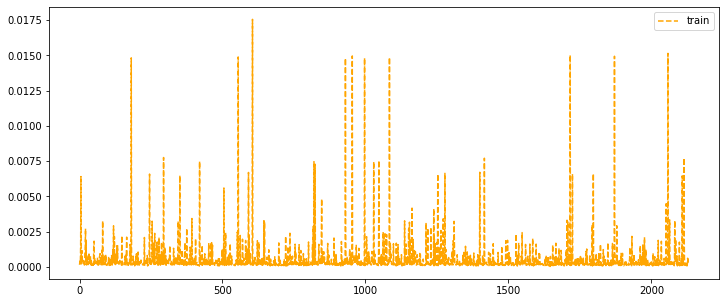

<Figure size 432x288 with 0 Axes>

avg train loss: 0.000537
avg val loss: 0.000541
* Epoch 5/20


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [186]:
device = 'cuda' if cuda.is_available() else 'cpu'
device = 'cpu'
custom_model = CustomFCL(data_full_main_scaled).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(custom_model.parameters(), lr=0.0001)

train(custom_model, optimizer, criterion, 20, train_loader, val_loader)

In [166]:
len(data_full_main_scaled.columns)

17

In [187]:
index = np.array(index)
index[[0,1, -3, 2]]
input_c = [12, 1000, 4,  5000, 3000]
check = []
for i, j in zip(input_c, index[[0,1, 12,  -3, -2]]):
    check.append(i/j)

In [188]:
check

[0.5,
 0.09859988168014198,
 0.36363636363636365,
 0.002280765153739629,
 0.008310225939285024]

In [189]:
generated_samples = custom_model(torch.Tensor(check))

In [190]:
generated_samples = generated_samples.detach().numpy()
final = []
for i, j in zip(generated_samples, index):
    final.append(i*j)

In [193]:
dic_to_print = {key: abs(value) for key, value in zip(data_full_main_scaled.columns, final)}

In [194]:
print(dic_to_print)

{'Основная отрасль': 12.228615760803223, 'Среднесписочная численность персонала, работающего в Москве, чел. 2021': 1028.3267409205437, 'Средняя з.п. сотрудников, работающих в Москве,  тыс.руб. 2021': 68.51626690541963, 'Налоги, уплаченные в бюджет Москвы, тыс.руб. 2022': 103989.12289983967, 'Налог на прибыль, тыс.руб. 2022': 64228.552208529785, 'Налог на имущество, тыс.руб. 2022': 11783.718003113823, 'Налог на землю, тыс.руб. 2022': 2818.0000790444187, 'НДФЛ, тыс.руб. 2022': 82430.8526607434, 'Транспортный налог, тыс.руб. 2022': 39.013845400823726, 'Прочие налоги 2022': 16196.84332398358, 'Кадастровая стоимость имущества, тыс.руб. 2022': 250177.77697177825, 'Кадастровая стоимость земли тыс.руб. 2022': 223342.63367843564, 'Адм.округ Москвы': 4.063325852155685, 'Средн.кадастр.стоимость \n1 кв.м., руб.': 19303.082593915762, 'Возможная площадь кв.м.': 9384.778147185825, 'Возможная площадь недвижимости кв.м.': 3162.411127585287, 'Прибыль тыс.руб. 2022': 300246.14768200554}


In [195]:
dic_input = {key: abs(value) for key, value in zip(data_full_main_scaled.columns[[0,1, 12,  -3, -2]], input_c)}

In [196]:
dic_input

{'Основная отрасль': 12,
 'Среднесписочная численность персонала, работающего в Москве, чел. 2021': 1000,
 'Адм.округ Москвы': 4,
 'Возможная площадь кв.м.': 5000,
 'Возможная площадь недвижимости кв.м.': 3000}

In [197]:
okrug_to_num

{'ВАО': 0,
 'ЗАО': 1,
 'ЗелАО': 2,
 'НАО': 3,
 'САО': 4,
 'СВАО': 5,
 'СЗАО': 6,
 'ТАО': 7,
 'ЦАО': 8,
 'ЮАО': 9,
 'ЮВАО': 10,
 'ЮЗАО': 11}

In [198]:
dic_to_change

{'Пищевая промышленность': 0,
 'Радиоэлектроника и приборостроение': 1,
 'Авиационная промышленность': 2,
 'Автомобильная промышленность': 3,
 'Общее машиностроение (в т.ч. оборудование пищевой переработки, дорожногстроительная и сельскохозяйственная техника)': 4,
 'Легкая промышленность': 5,
 'Производство кокса и нефтепродуктов': 6,
 'Химическая промышленность': 7,
 'Производство строительных материалов': 8,
 'Производство оружия, боеприпасов, спецхимии, военных машин': 9,
 'Фармацевтическая промышленность': 10,
 'Топливно-энергетический комплекс': 11,
 'Медицинская промышленность': 12,
 'Кабельная промышленность': 13,
 'Деревообрабатывающая': 14,
 'Металлургия и металлообработка': 15,
 'Полиграфическая деятельность': 16,
 'Производство прочих товаров народного потребления': 17,
 'Производство напитков': 18,
 'Научная деятельность': 19,
 'Станкоинструментальная промышленность': 20,
 'Судостроение': 21,
 'Производство ж/д транспорта': 22,
 'Производство бытовой электроники и электриче

In [199]:
torch.save(custom_model, 'model_Hakaton')

In [206]:
dataframe_main['Подотрасль промышленности'].unique()

array(['Молочная отрасль ', 'Приборостроение', 'Мясная отрасль ',
       'Сведения отсутствуют', 'Кондитерская отрасль ',
       'Производство прочих машин и оборудования общего назначения',
       'Хлебопекарная отрасль ', 'Производство ж/д транспорта',
       'Рыбная отрасль',
       'Производство машин и оборудования общего назначения',
       'Производство плодоовощных консервов', 'Электротехника',
       'Производство прочих машин специального назначения',
       'Станкоинструментальная промышленность', 'Микроэлектроника',
       'Мукомольно-крупяная отрасль ', 'Иные отрасли',
       'Производство напитков', 'Корма для животных',
       'Электротехника/Судостроение', 'Сахарная отрасль ',
       'Производство машин и оборудования для сельского и лесного хозяйства',
       'Масложировая отрасль ', 'Металлообработка'], dtype=object)

In [47]:
test = data_full_main_copy['Налоги, уплаченные в бюджет Москвы, тыс.руб. 2022'] - (data_full_main_copy['Налог на прибыль, тыс.руб. 2022'] +
                                                                    data_full_main_copy['Налог на имущество, тыс.руб. 2022'] +
                                                                        data_full_main_copy['Налог на землю, тыс.руб. 2022'] +
                                                                                  data_full_main_copy['НДФЛ, тыс.руб. 2022'] + 
                                                                        data_full_main_copy['Транспортный налог, тыс.руб. 2022'] +
                                                                           data_full_main_copy['Прочие налоги 2022']       )







In [50]:
test.to_frame().min()

0   -1393920.24376
dtype: object

In [126]:
dic_to_change

{'Пищевая промышленность': 0,
 'Радиоэлектроника и приборостроение': 1,
 'Авиационная промышленность': 2,
 'Автомобильная промышленность': 3,
 'Общее машиностроение (в т.ч. оборудование пищевой переработки, дорожногстроительная и сельскохозяйственная техника)': 4,
 'Легкая промышленность': 5,
 'Производство кокса и нефтепродуктов': 6,
 'Химическая промышленность': 7,
 'Производство строительных материалов': 8,
 'Производство оружия, боеприпасов, спецхимии, военных машин': 9,
 'Фармацевтическая промышленность': 10,
 'Топливно-энергетический комплекс': 11,
 'Медицинская промышленность': 12,
 'Кабельная промышленность': 13,
 'Деревообрабатывающая': 14,
 'Металлургия и металлообработка': 15,
 'Полиграфическая деятельность': 16,
 'Производство прочих товаров народного потребления': 17,
 'Производство напитков': 18,
 'Научная деятельность': 19,
 'Станкоинструментальная промышленность': 20,
 'Судостроение': 21,
 'Производство ж/д транспорта': 22,
 'Производство бытовой электроники и электриче

In [127]:
okrug_to_num

{'ВАО': 0,
 'ЗАО': 1,
 'ЗелАО': 2,
 'НАО': 3,
 'САО': 4,
 'СВАО': 5,
 'СЗАО': 6,
 'ТАО': 7,
 'ЦАО': 8,
 'ЮАО': 9,
 'ЮВАО': 10,
 'ЮЗАО': 11}